In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

# Plot the cluster differences-testing visualizations

In [3]:
data = pd.read_csv('./../Data/Clusters_EfficiencyinPRS/OA_Clusters_full_data.csv')
grouped_data = pd.read_csv('./../Data/Clusters_EfficiencyinPRS/OA_Clusters_grouped.csv')


In [4]:
grouped_data[grouped_data.type == 'mean']

cluster_9  Total_N_residents  N_residents_no_community  N_dwellings  \
9         1.0         324.925461                321.547450   140.947179   
10        2.0         237.126224                224.587595   129.947769   
11        3.0         294.059553                220.743176   155.857320   
12        4.0         300.493840                293.551258   147.045248   
13        5.0         335.027619                319.543576   138.804214   
14        6.0         293.926829                276.221407   156.024390   
15        7.0         328.447821                323.115967   139.070285   
16        8.0         277.623806                254.962978   159.449045   
17        9.0         313.676803                304.897771   152.590523   

    N_households     H_1-2_p    H_3-4_p    H_5-7_p  H_8-more_p  N_of_people  \
9     134.585449   85.031506  40.419485   8.734247    0.398787   321.200767   
10    101.384113   72.027203  24.110990   5.060936    0.203482   224.235038   
11    125.122829  106.436725  15.941687   2.377171    0.275434   220.074442   
12    132.249683   92.289480  32.680803   6.903457    0.379676   293.133129   
13    125.170008   74.422463  36.071195  13.378273    1.286416   318.300123   
14    138.471939  104.902913  27.696898   5.419607    0.456547   275.682216   
15    130.844889   79.959588  38.986807  10.908875    0.990254   322.097821   
16    127.714172   98.181131  22.742834   6.071258    0.742038   254.079220   
17    136.917079   94.169107  33.657681   8.254640    0.853558   303.946180   

    ...  mean_house_area  median_house_area  max_house_area  min_house_area  \
9   ...        92.768260          86.385650      238.235242       41.874388   
10  ...       127.828805         101.864136      554.540455       39.281564   
11  ...        60.637658          56.140527      195.692164       26.086951   
12  ...       107.236079          92.886101      375.540331       34.275225   
13  ...        84.546721          80.877625      215.000806       35.242251   
14  ...        65.608196          59.233828      204.146952       26.960295   
15  ...        85.634915          80.271172      220.188407       36.874538   
16  ...        77.392888          64.693142      328.347867       21.510237   
17  ...        78.343485          68.616300      262.246260       25.655797   

    count_houses  household_density_mean  pop_hous_density_mean  \
9      89.847338                1.544985               3.647607   
10     85.663765                0.906659               1.945164   
11    173.646692                2.185462               3.799919   
12     97.062570                1.419604               3.077008   
13    109.030074                1.543546               3.859014   
14    132.946957                2.199547               4.330734   
15     95.252853                1.597042               3.884140   
16    127.016720                1.798108               3.515805   
17    114.777778                1.853306               4.078202   

    household_density_median  pop_hous_density_median  type  
9                        NaN                      NaN  mean  
10                  1.117124                 2.403805  mean  
11                  2.445045                 4.256690  mean  
12                  1.611908                 3.489751  mean  
13                  1.614561                 4.029328  mean  
14                  2.444424                 4.812178  mean  
15                  1.704917                 4.132791  mean  
16                  2.152391                 4.204045  mean  
17                  2.103101                 4.613488  mean  

[9 rows x 116 columns]

In [5]:
print(grouped_data.columns[1:113])

Index(['Total_N_residents', 'N_residents_no_community', 'N_dwellings',
       'N_households', 'H_1-2_p', 'H_3-4_p', 'H_5-7_p', 'H_8-more_p',
       'N_of_people', 'CHILDREN_1_2',
       ...
       'N_mature_adults_40_64_rate_P', 'N_retirees_65_m_rate_P',
       'N_immigrants_arrived_after18_rate_P', 'mean_house_area',
       'median_house_area', 'max_house_area', 'min_house_area', 'count_houses',
       'household_density_mean', 'pop_hous_density_mean'],
      dtype='object', length=112)


In [4]:
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Columns: 114 entries, cluster_9 to type
dtypes: float64(113), object(1)
memory usage: 40.2+ KB


In [7]:
list1 = grouped_data.type.unique()
list2 = grouped_data.columns[1:127]
list3 = grouped_data.drop(columns={'H_8-more_p',}).columns[1:127]
list2

Index(['Total_N_residents', 'N_residents_no_community', 'N_dwellings',
       'N_households', 'H_1-2_p', 'H_3-4_p', 'H_5-7_p', 'H_8-more_p',
       'N_of_people', 'CHILDREN_1_2',
       ...
       'mean_house_area', 'median_house_area', 'max_house_area',
       'min_house_area', 'count_houses', 'household_density_mean',
       'pop_hous_density_mean', 'household_density_median',
       'pop_hous_density_median', 'type'],
      dtype='object', length=115)

In [8]:
print(data.cluster_9.unique())
month_dict = {1: 'Cluster 1',
              2: 'Cluster 2',
              3: 'Cluster 3',
              4: 'Cluster 4',
              5: 'Cluster 5',
              6: 'Cluster 6',
              7: 'Cluster 7',
              8: 'Cluster 8',
              9: 'Cluster 9'}

[7. 1. 4. 5. 9. 6. 8. 3. 2.]


In [9]:
color_list = {1:'#ddcc77',2:'#aa4499',3:'#332288',4:'#882255',5:'#117733',6:'#44aa99',7:'#ee99aa',8:'#88ccee',9:'#999933'}

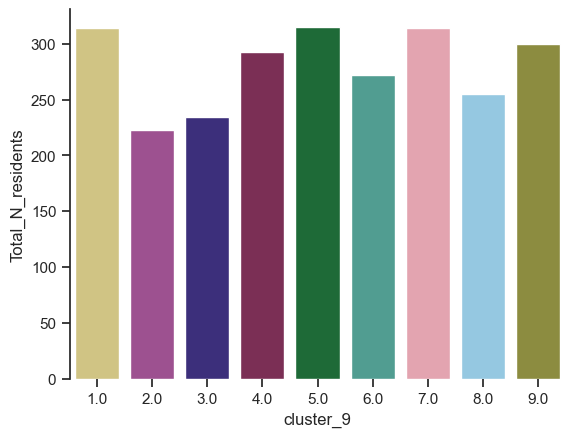

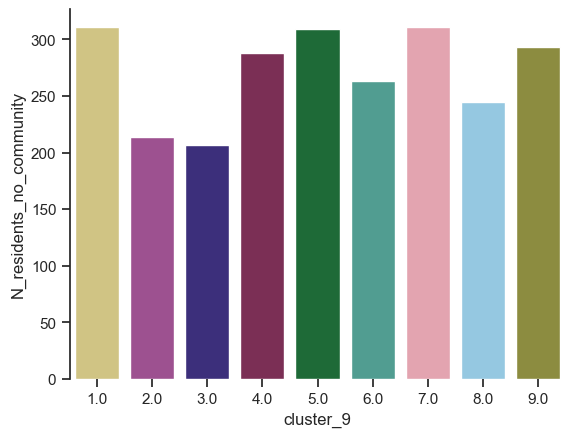

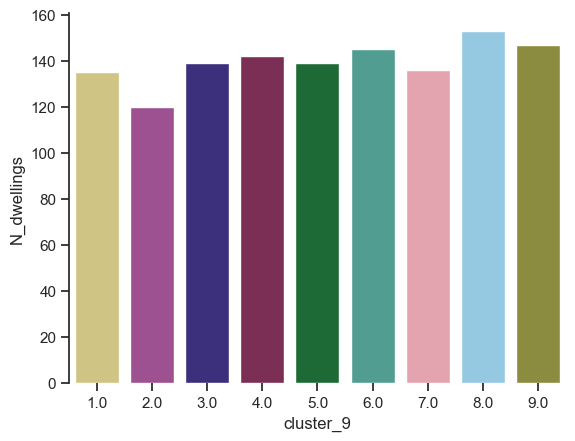

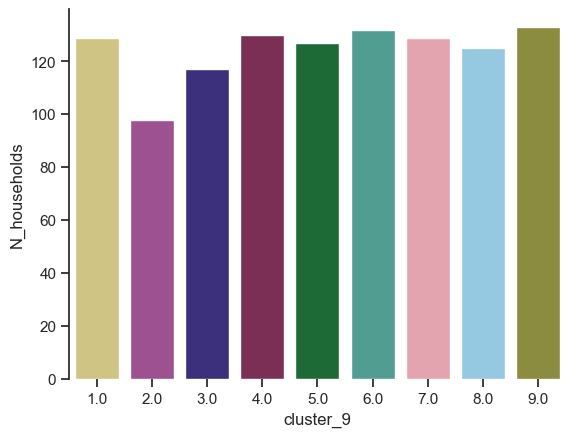

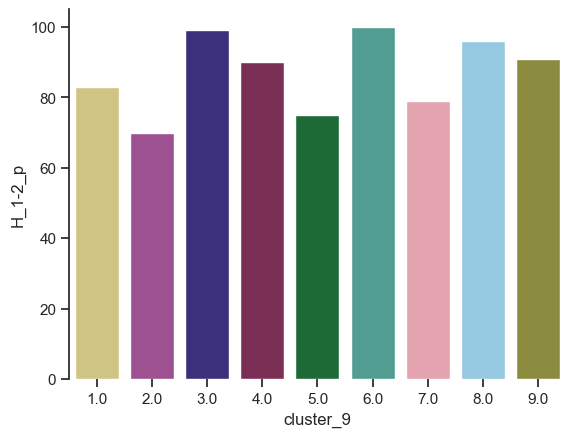

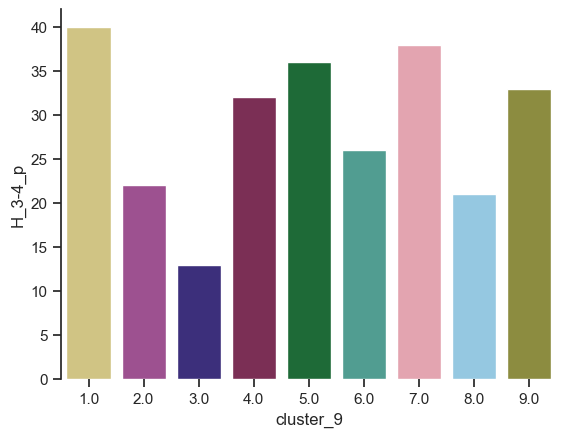

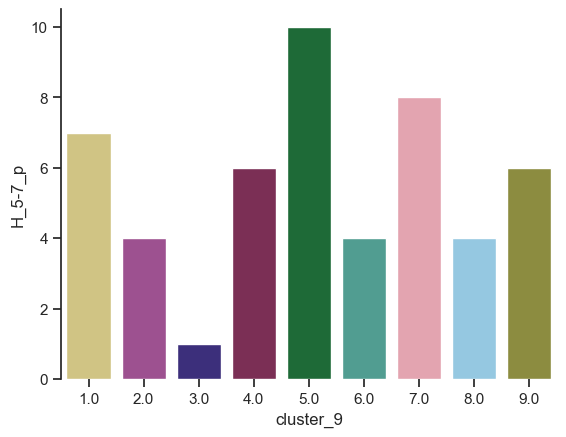

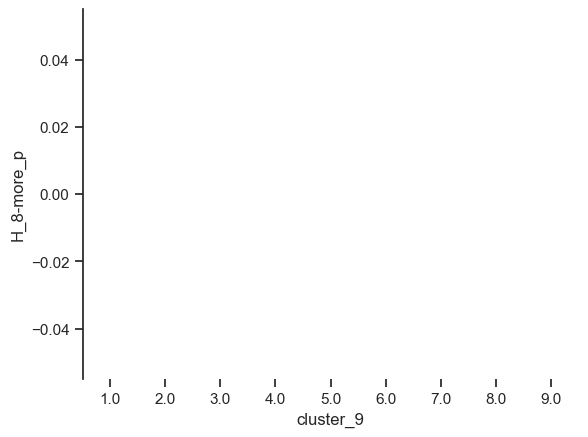

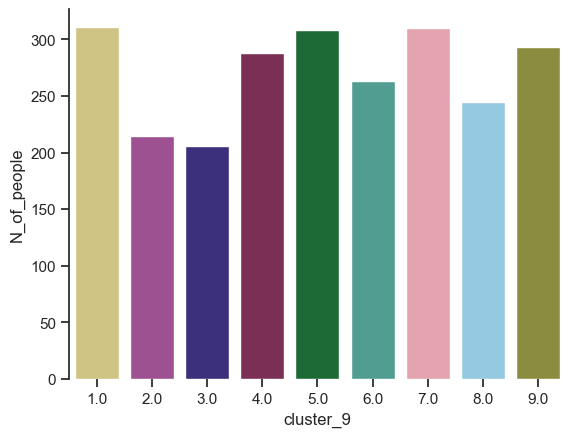

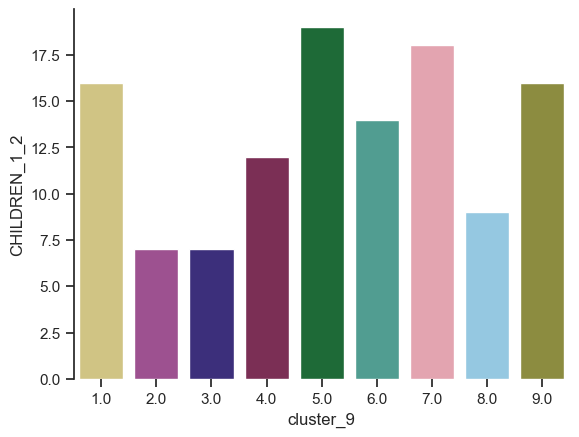

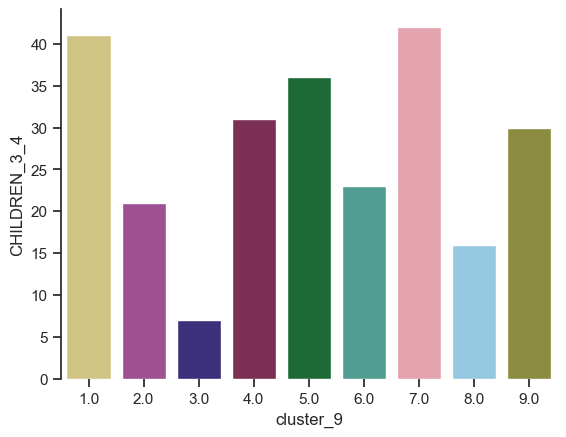

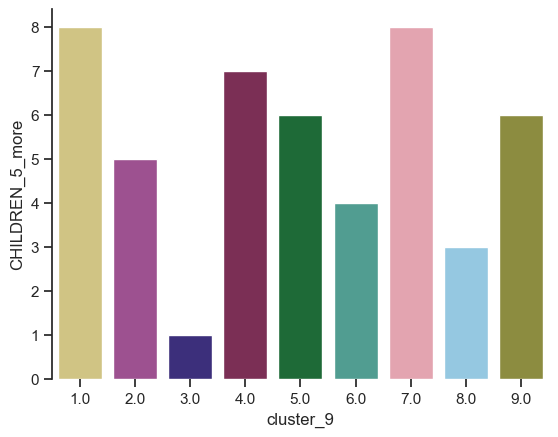

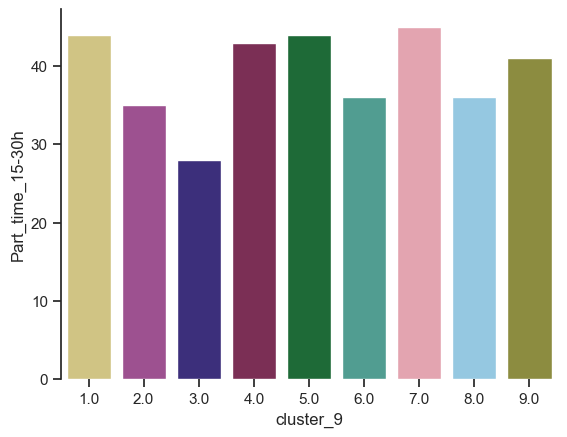

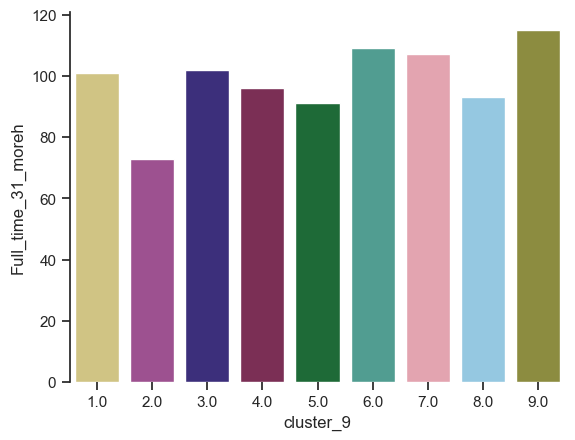

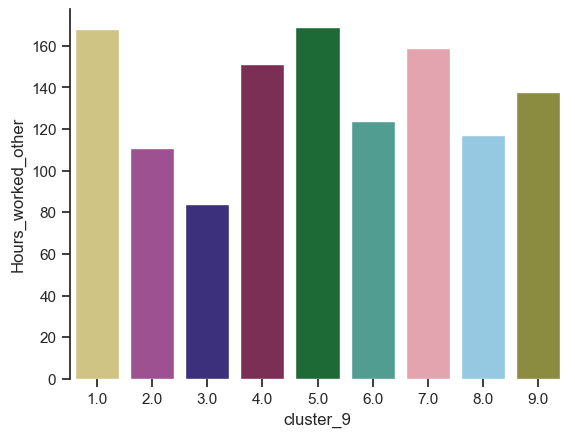

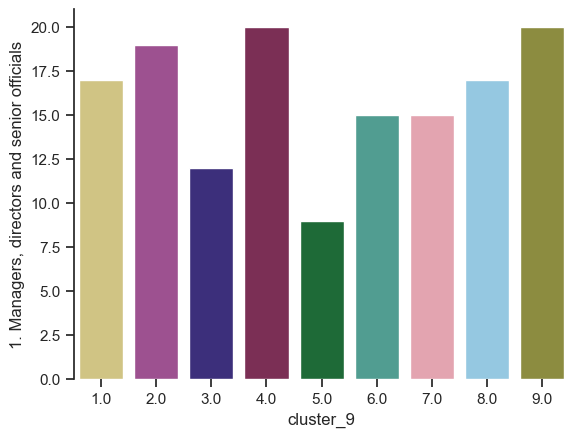

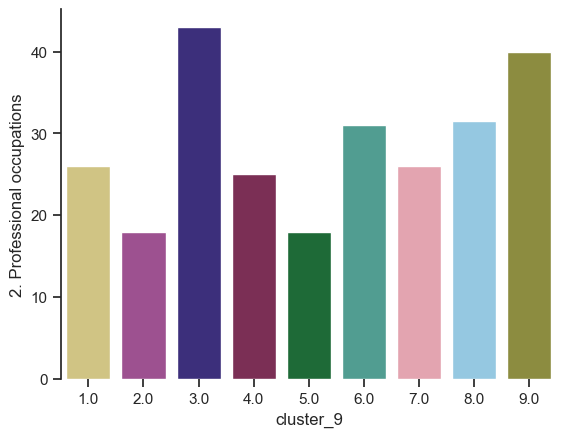

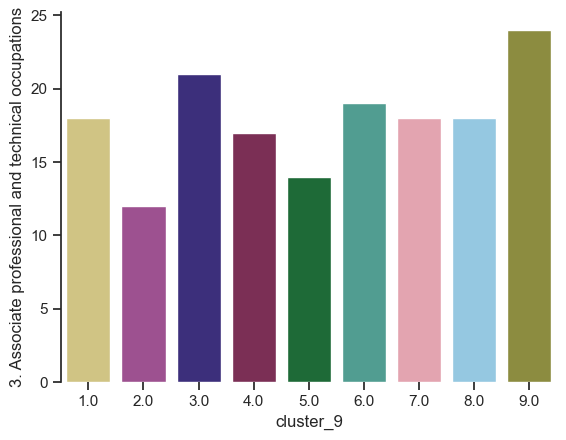

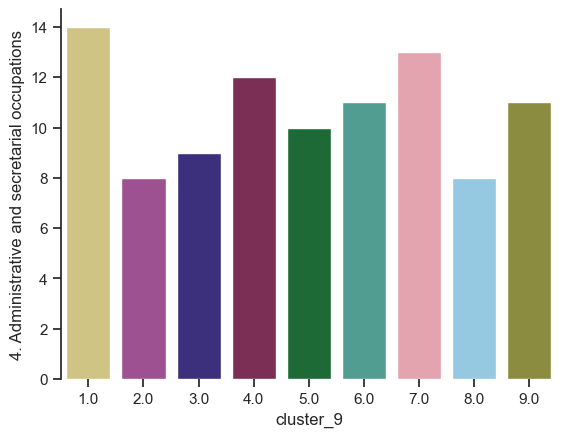

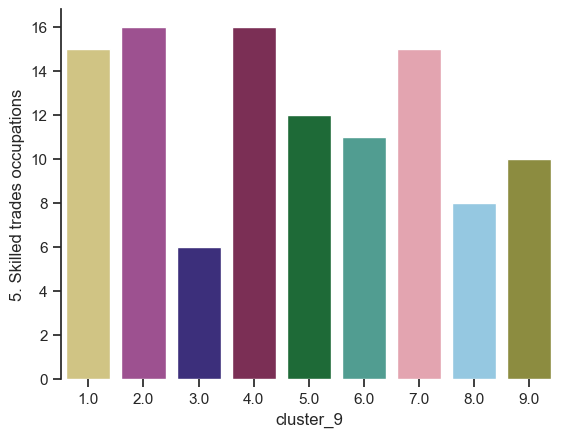

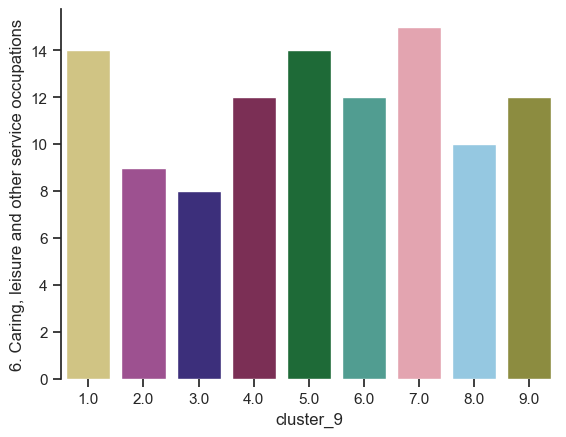

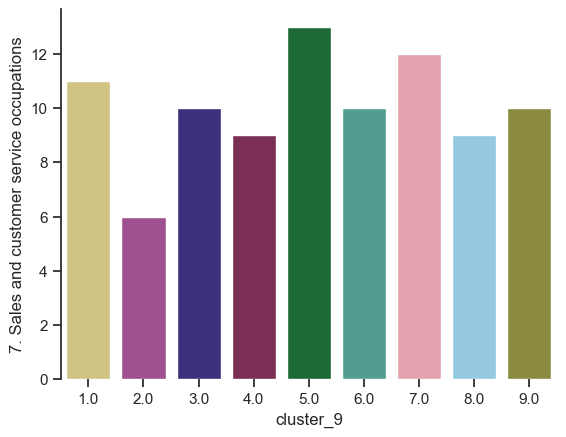

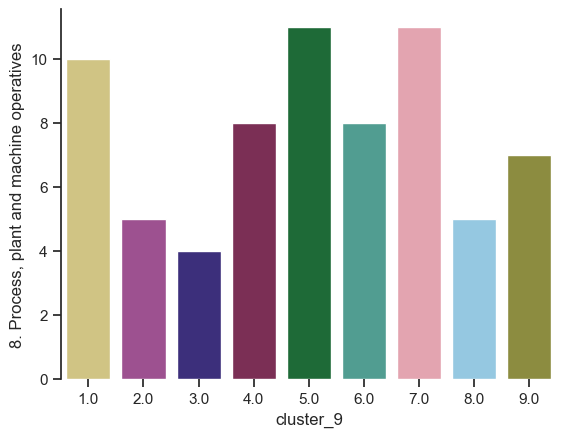

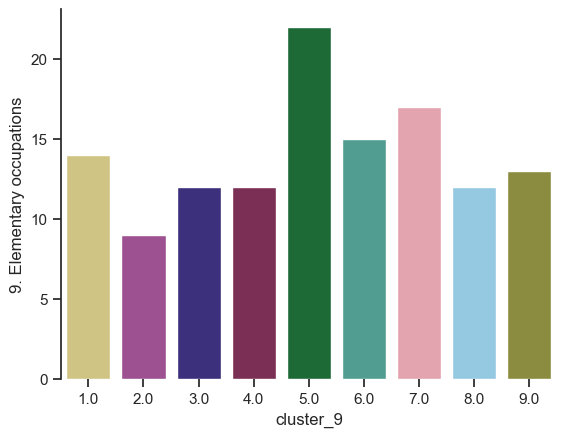

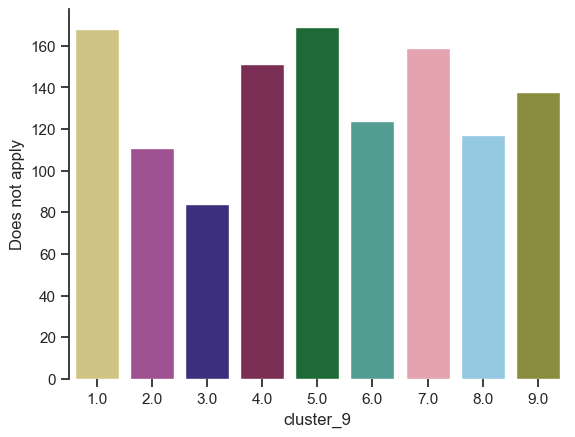

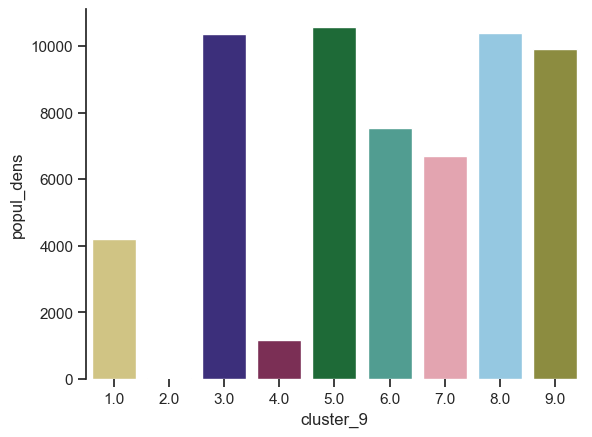

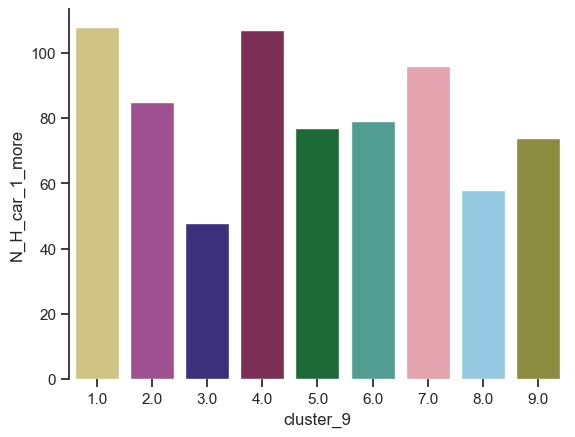

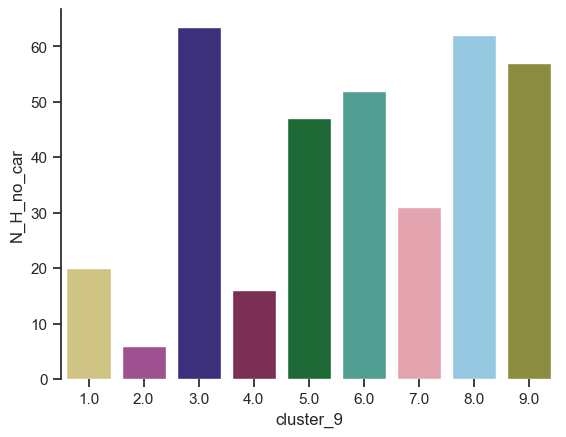

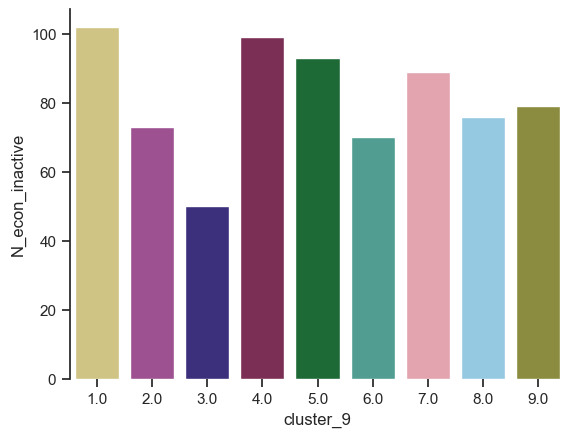

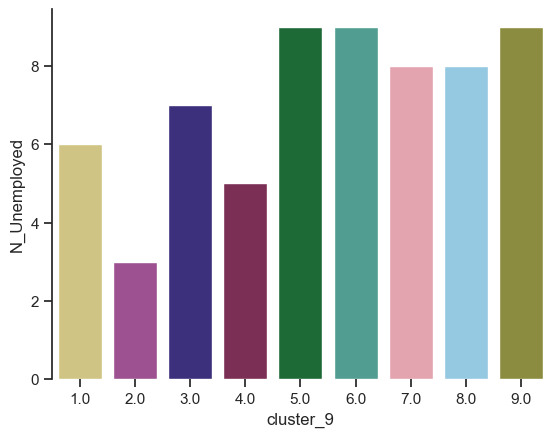

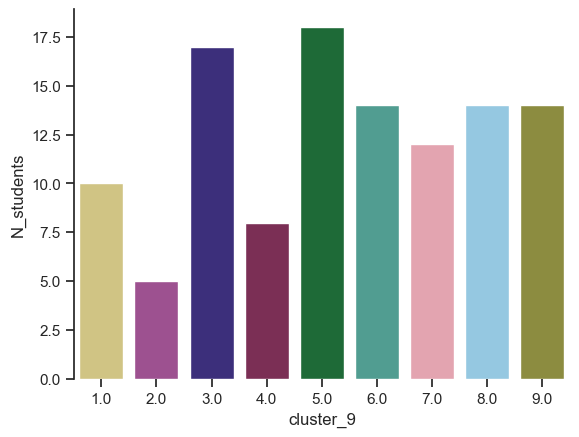

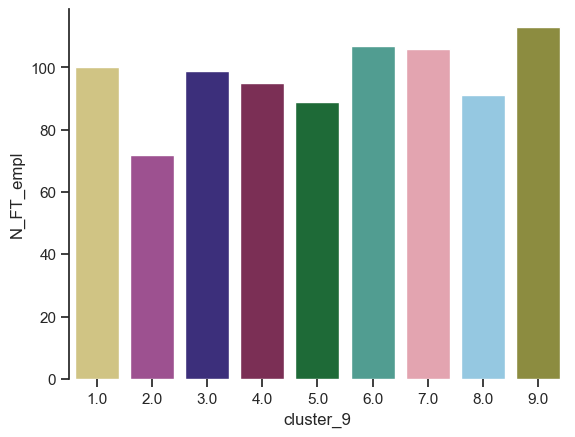

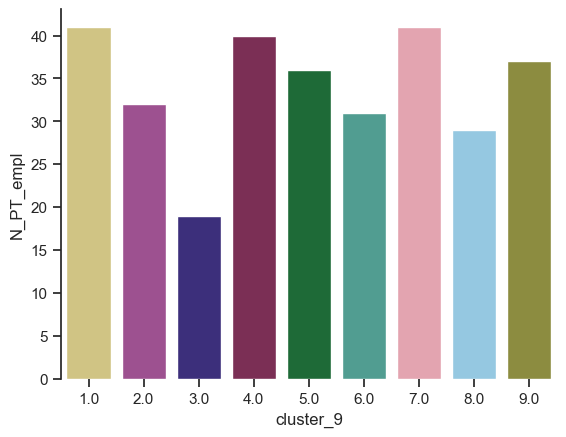

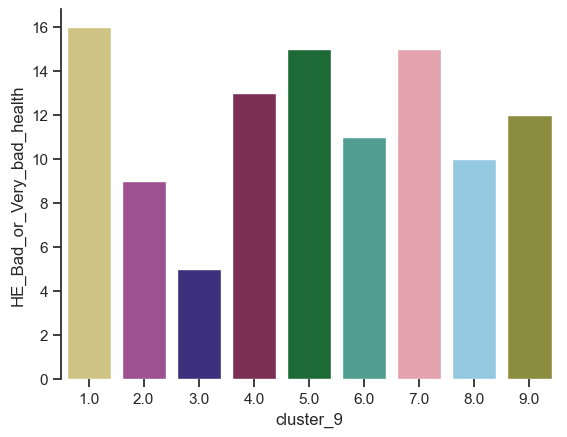

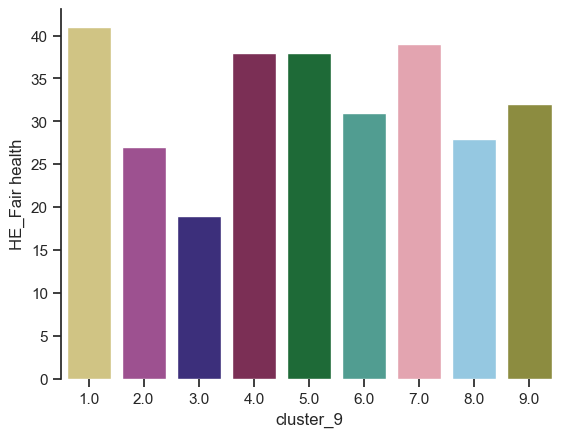

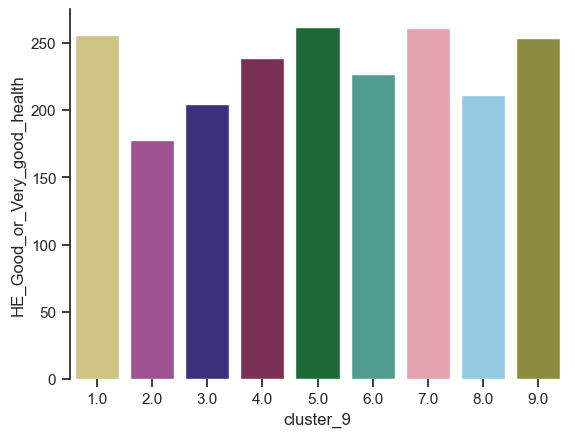

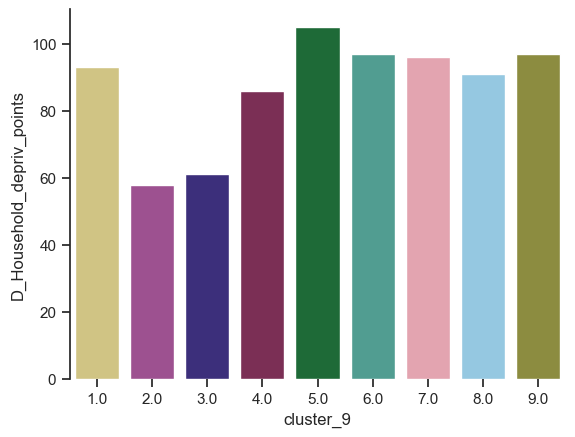

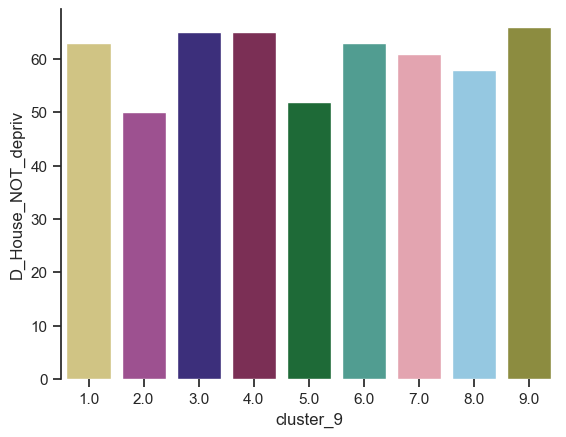

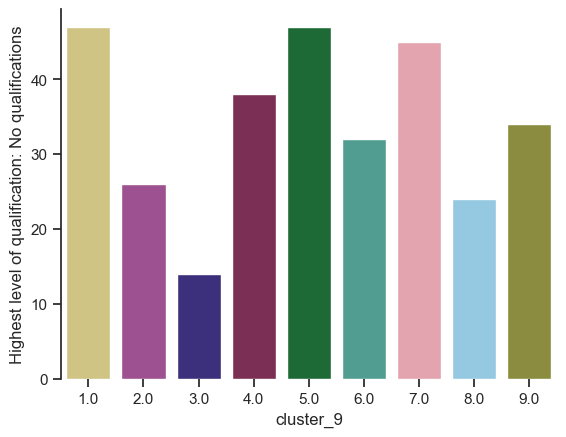

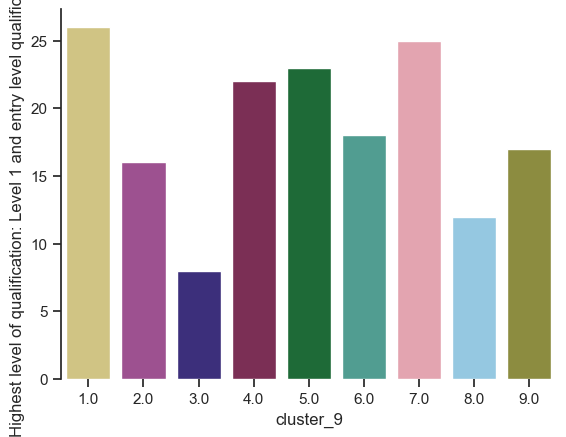

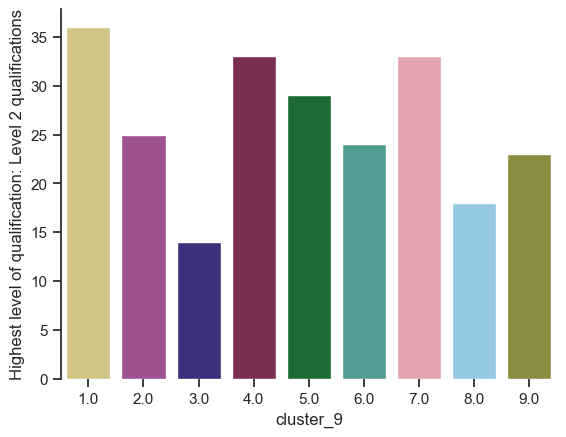

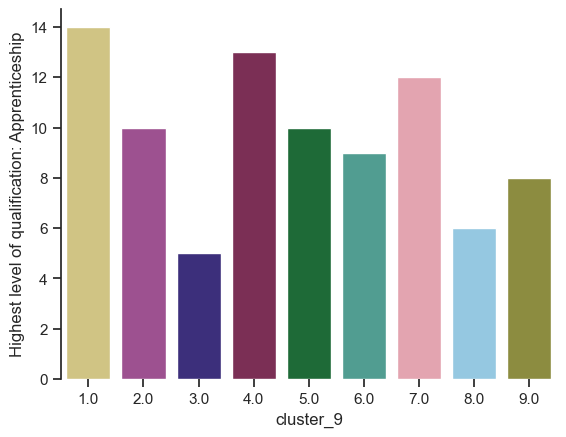

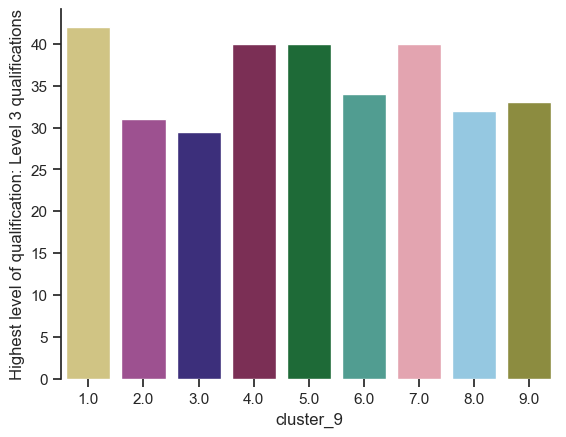

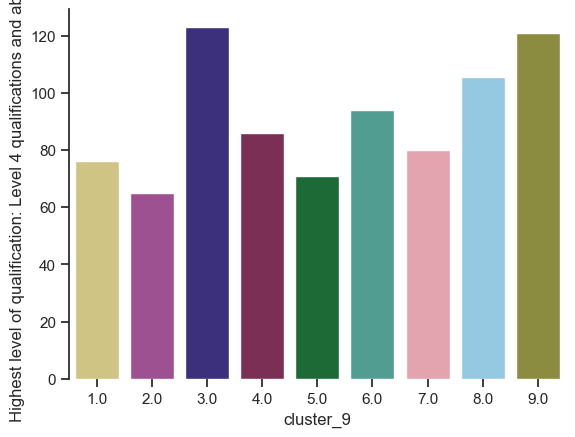

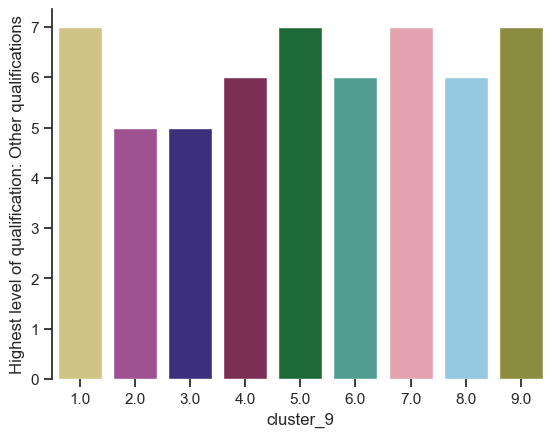

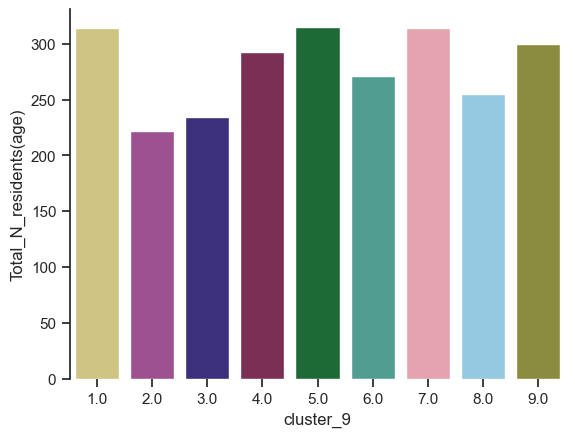

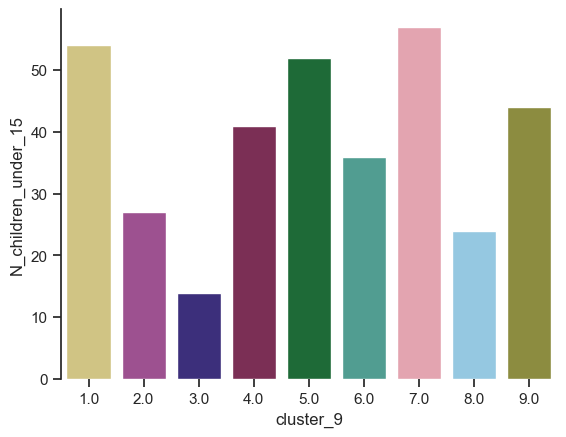

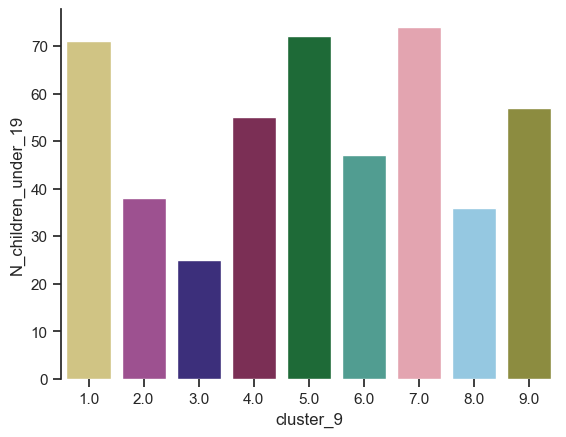

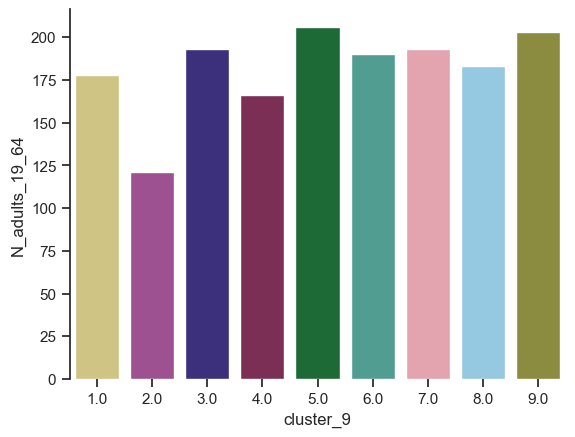

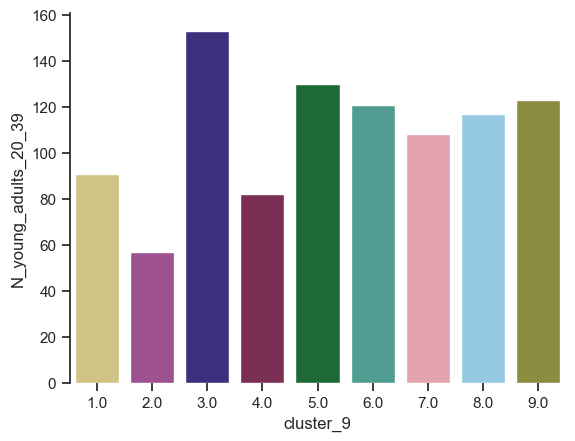

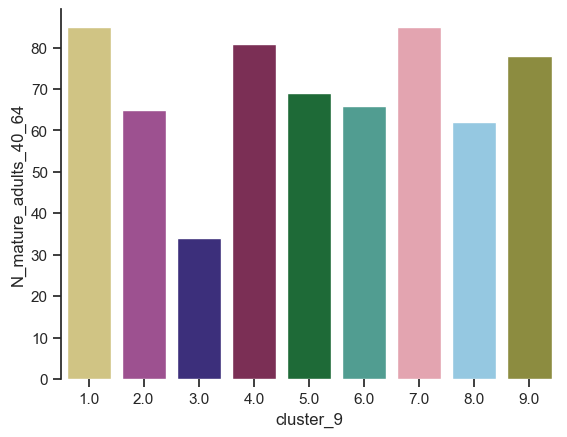

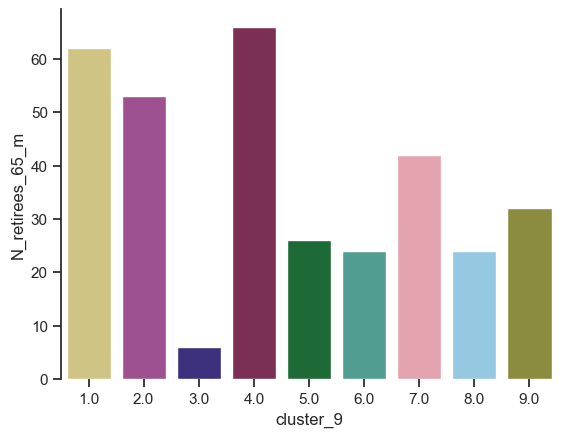

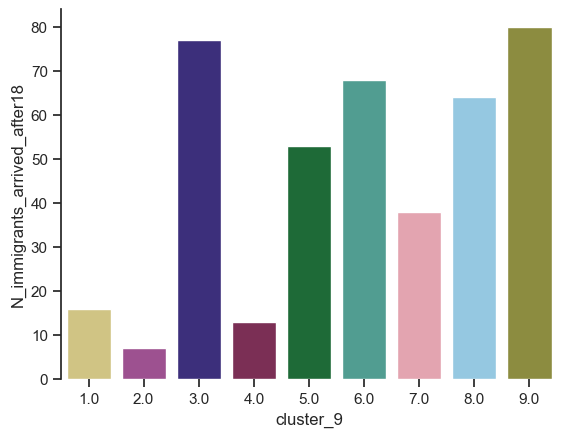

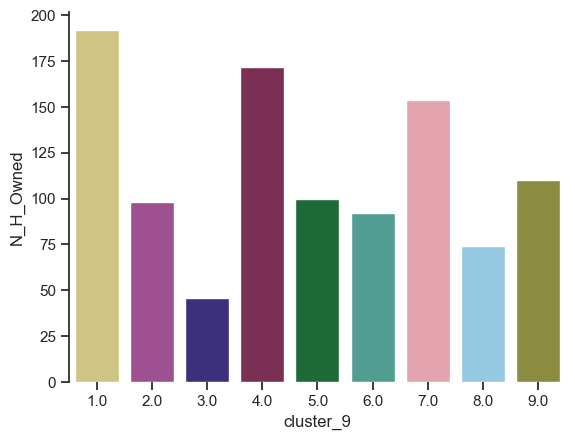

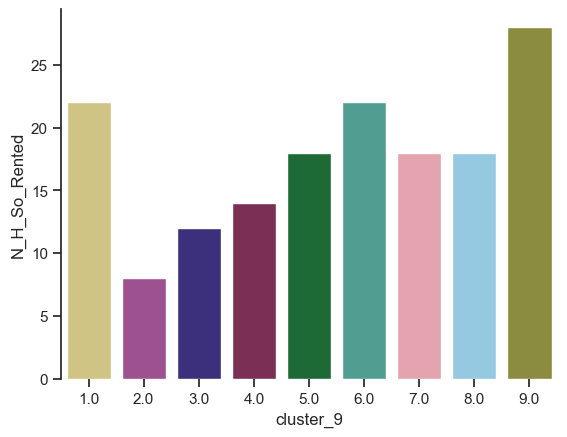

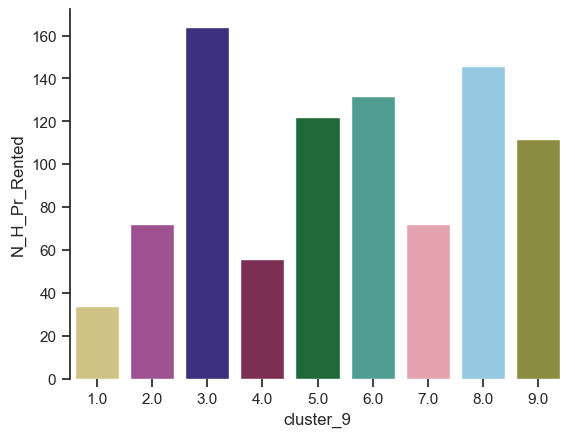

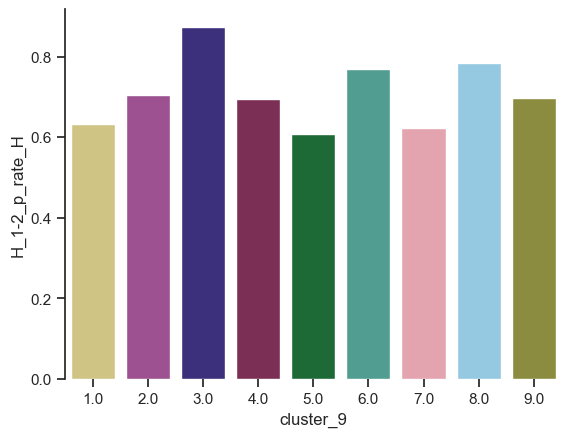

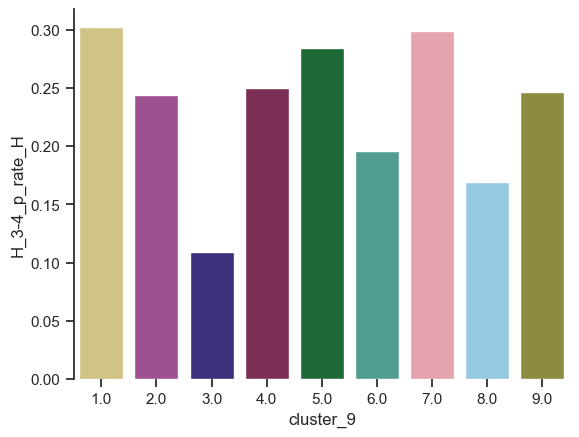

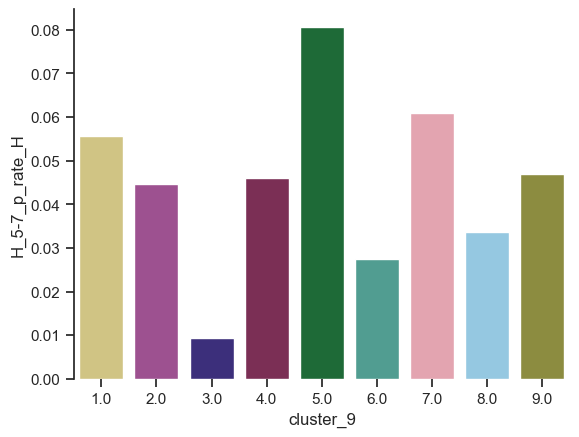

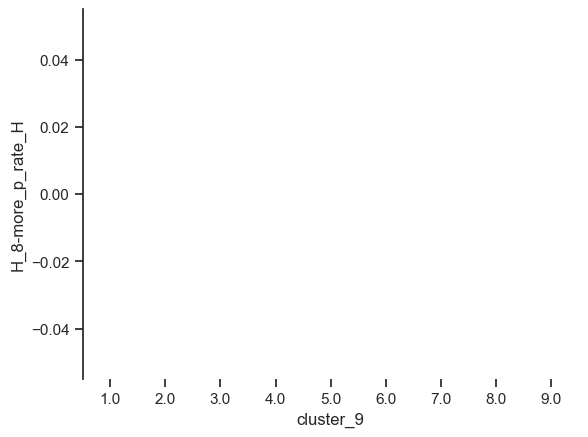

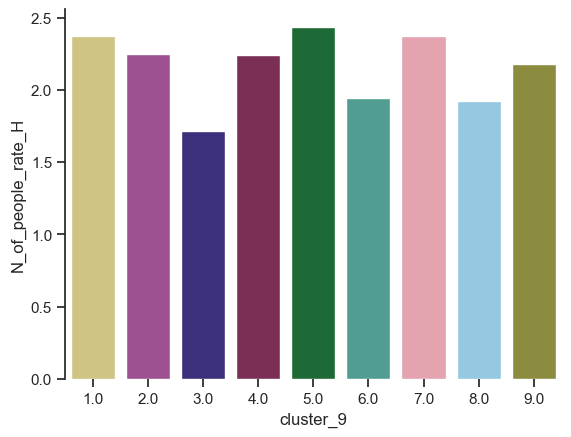

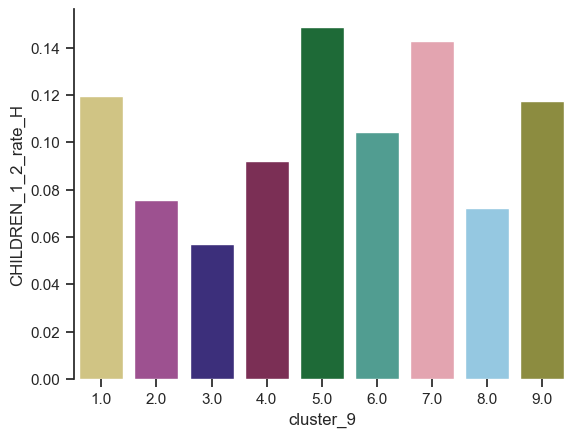

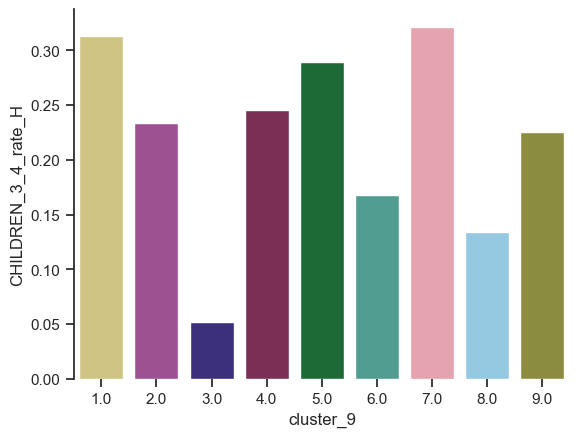

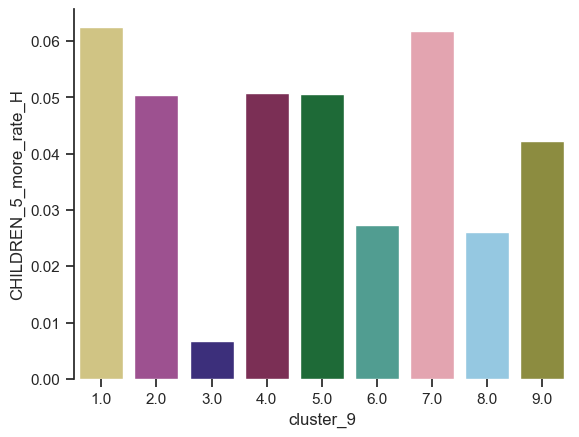

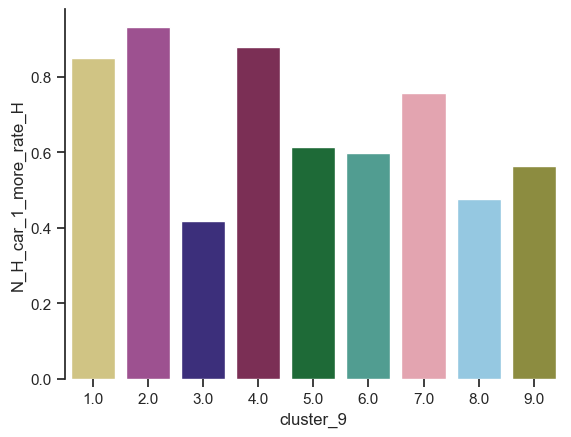

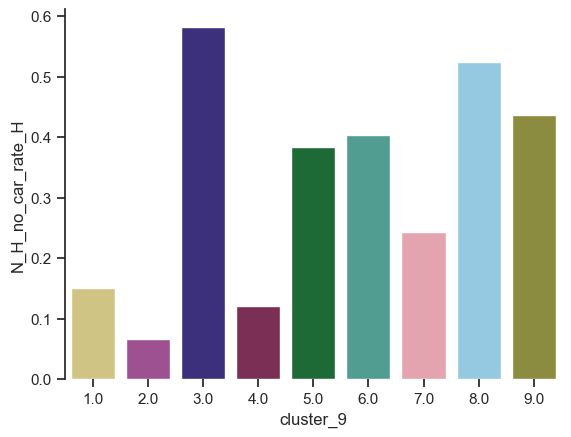

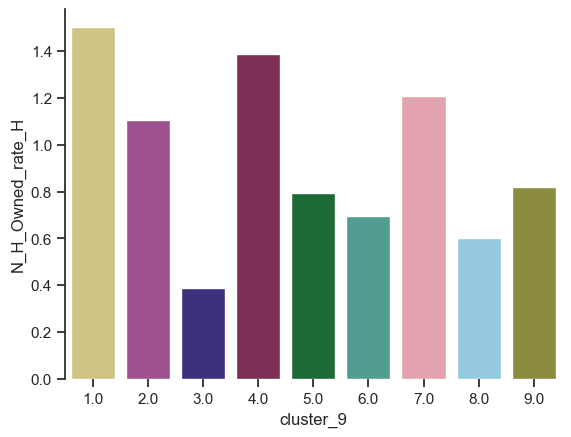

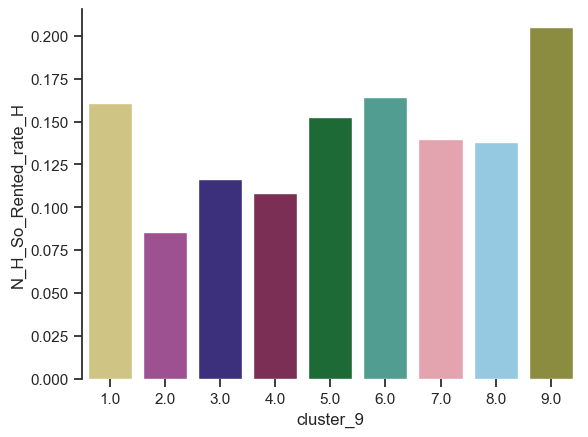

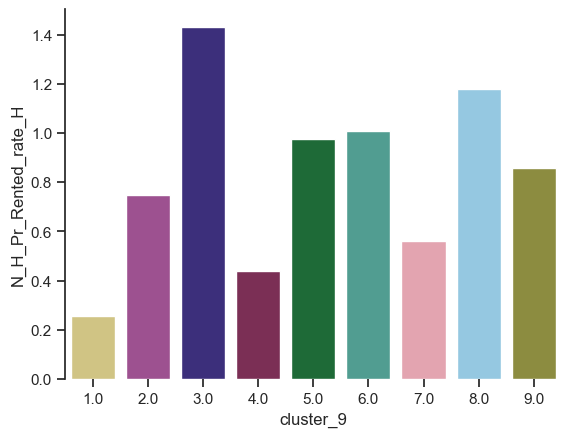

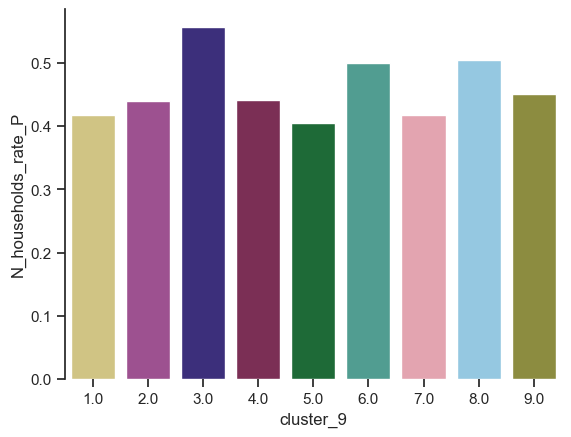

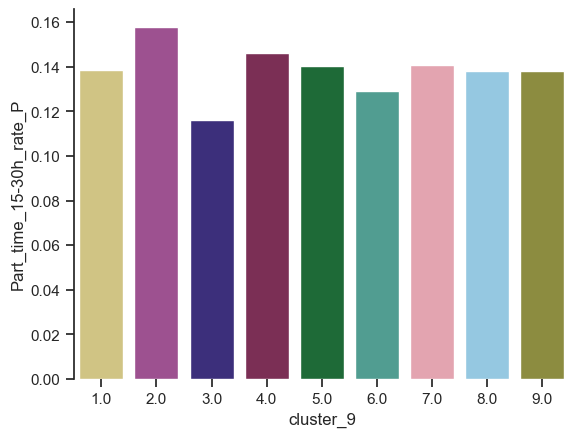

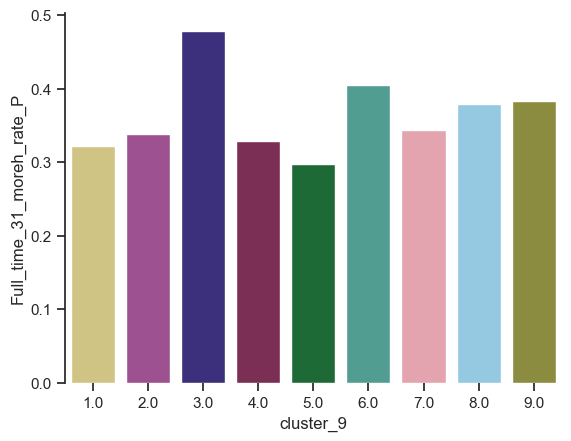

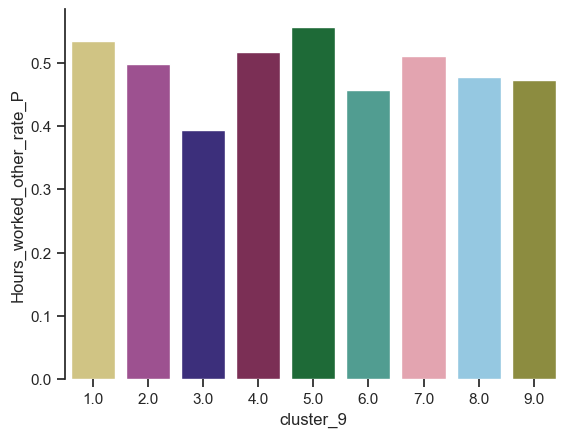

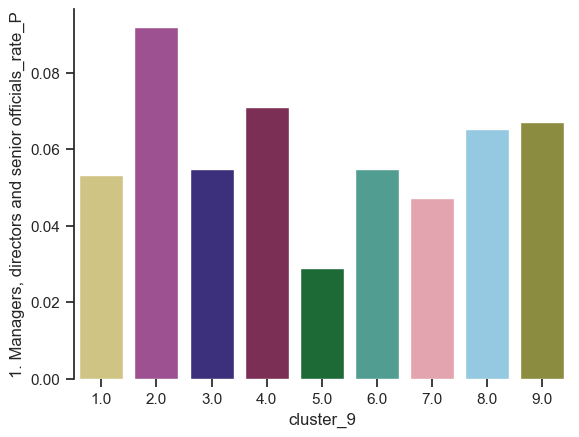

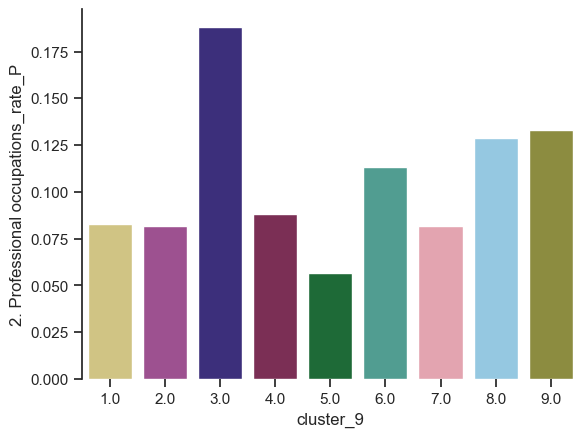

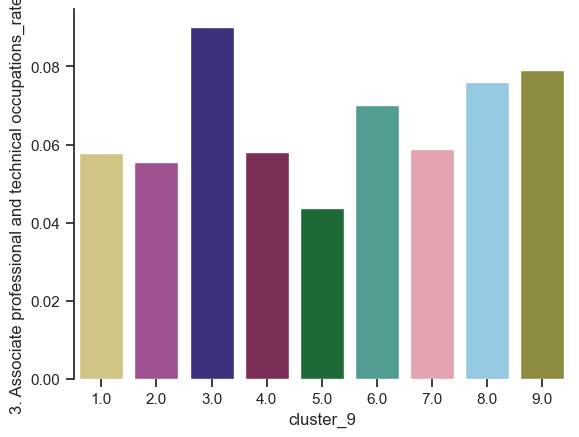

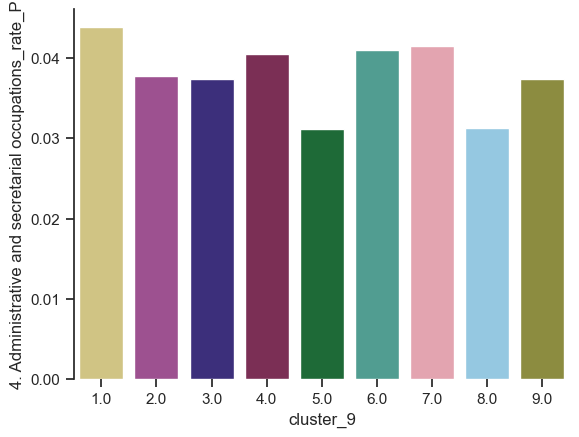

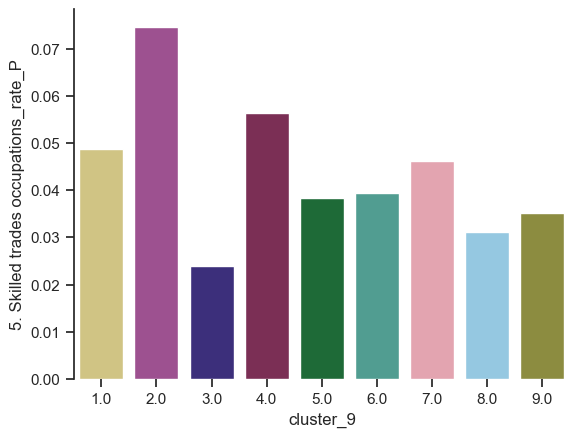

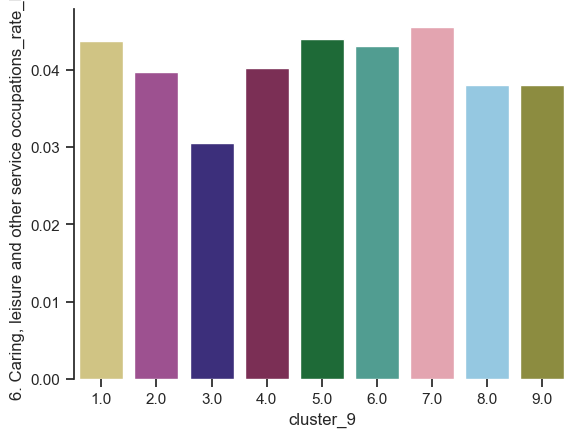

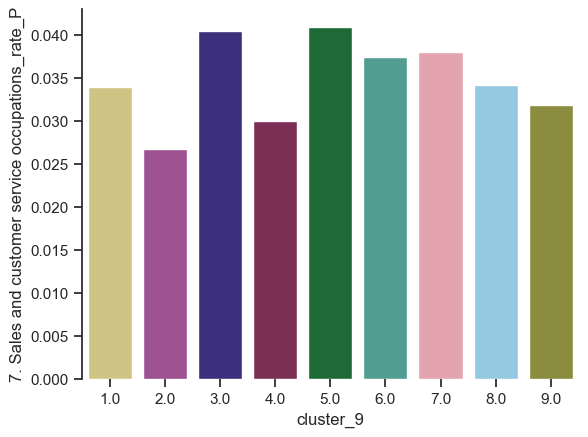

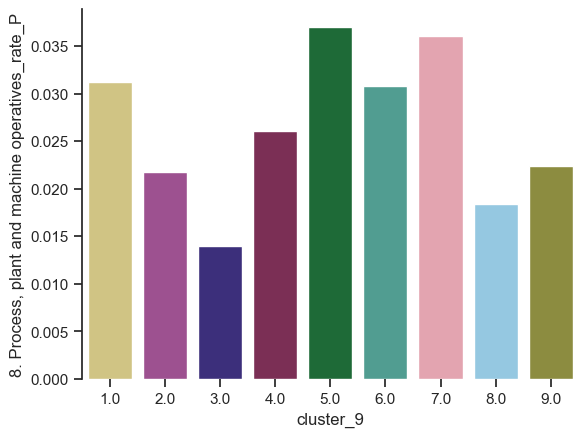

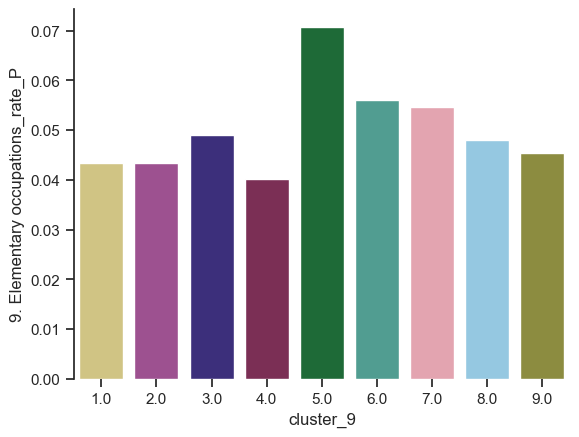

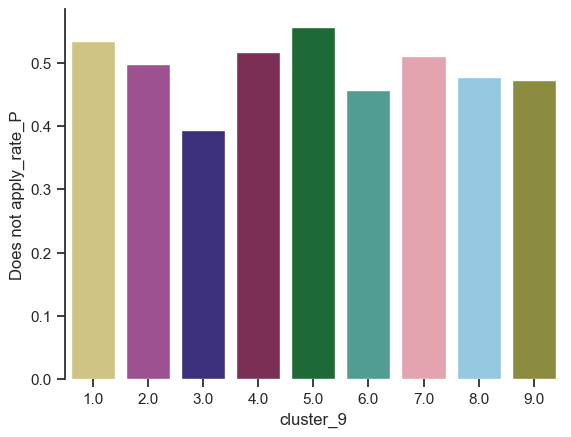

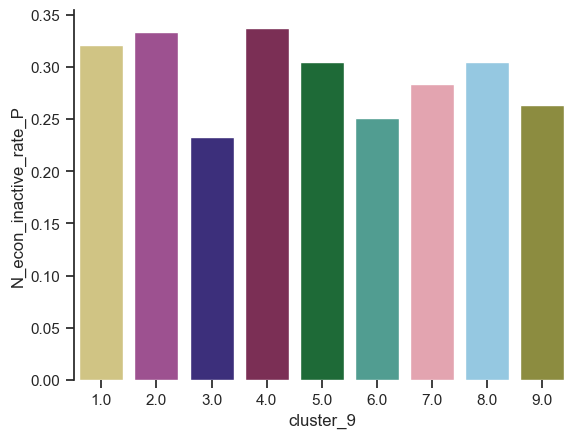

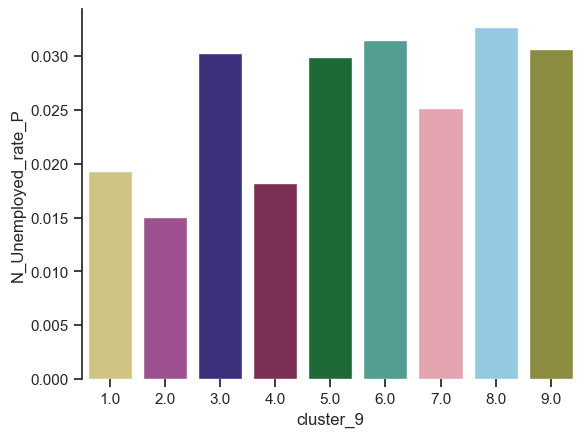

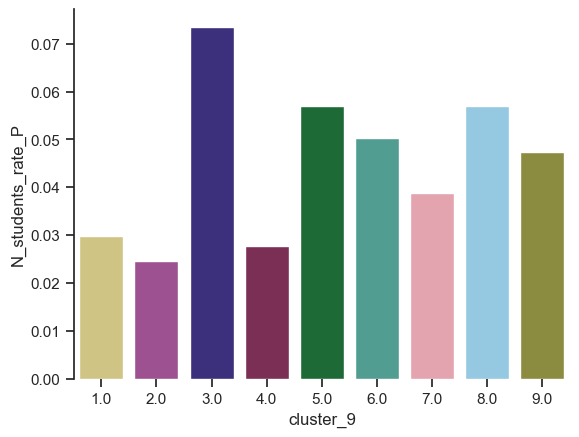

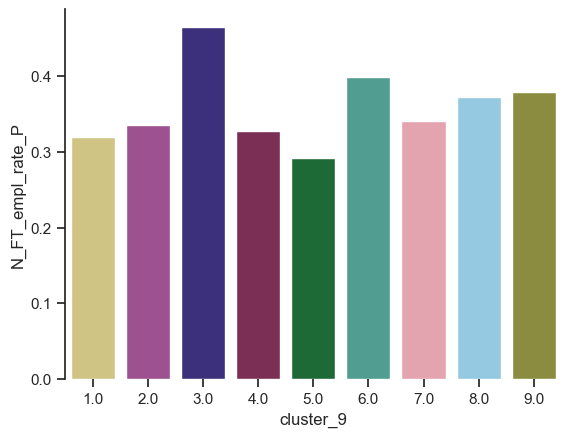

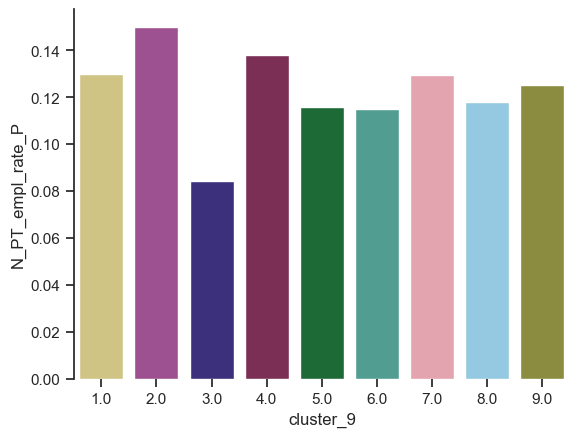

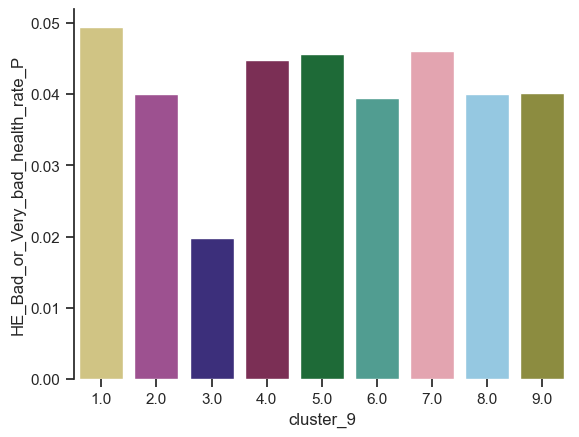

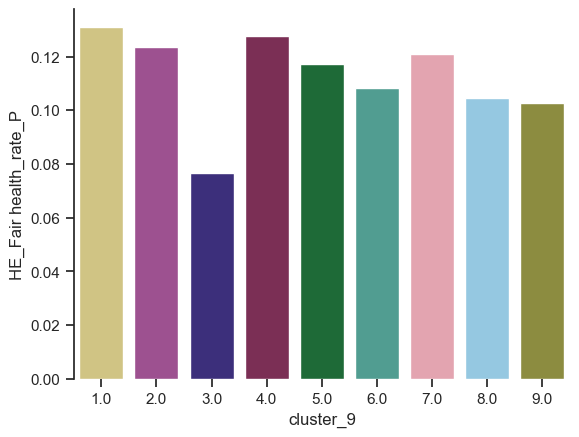

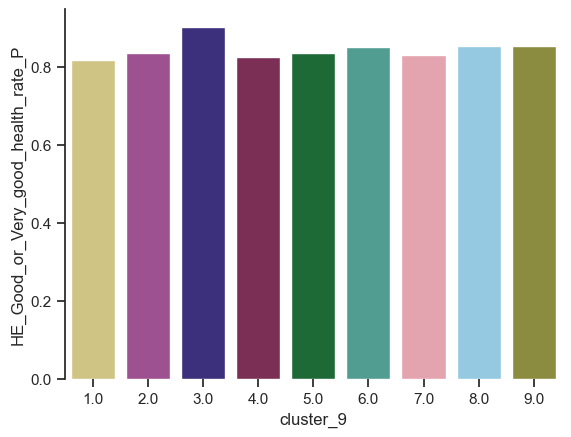

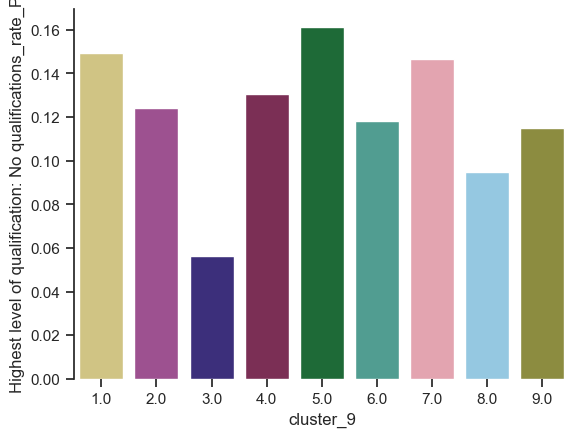

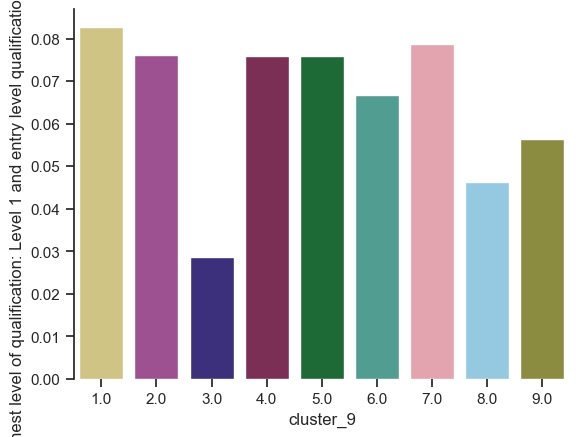

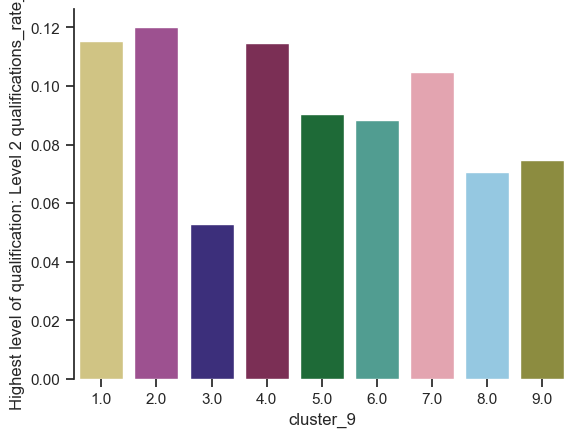

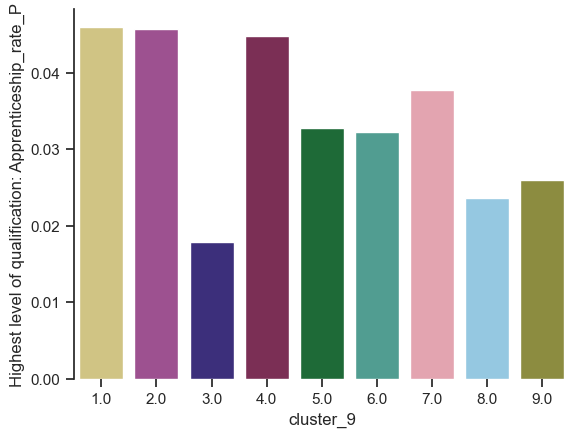

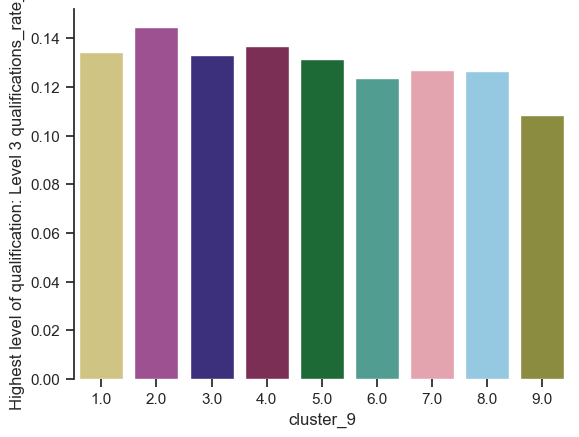

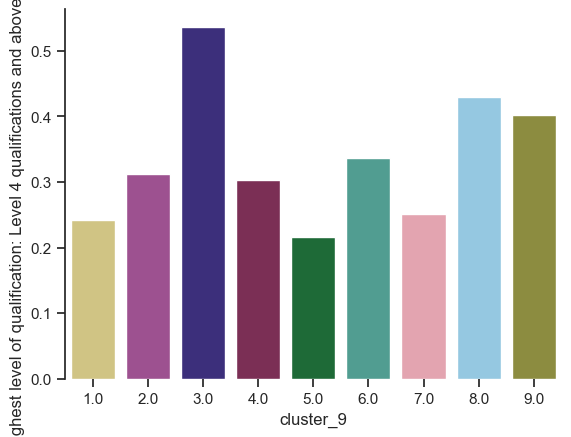

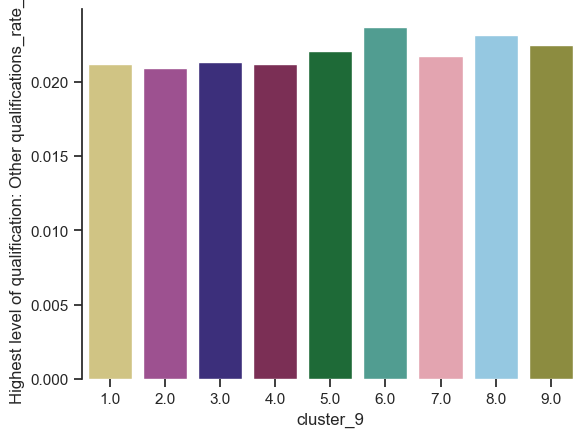

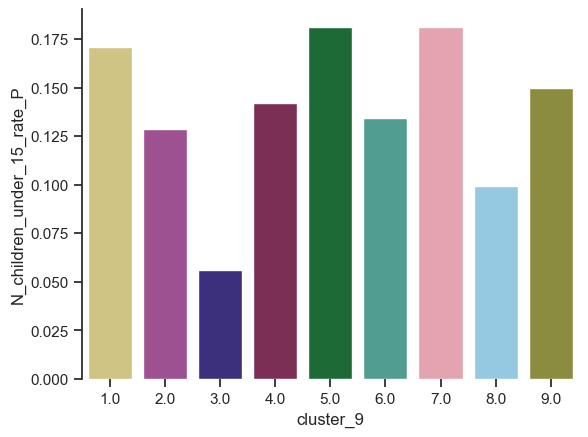

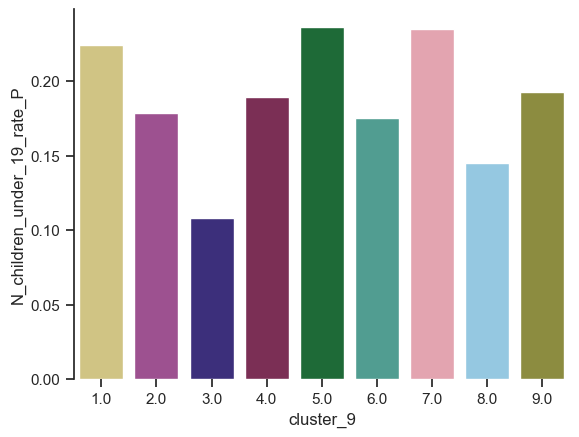

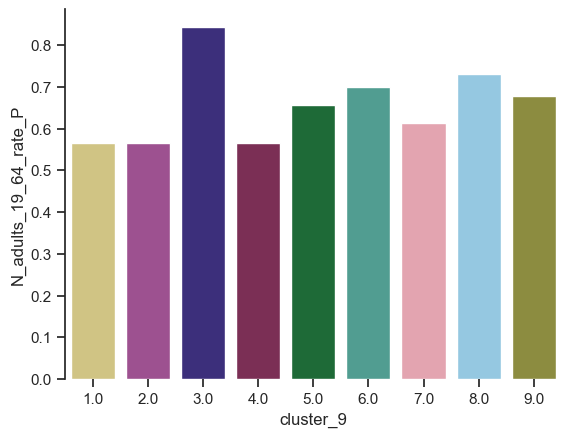

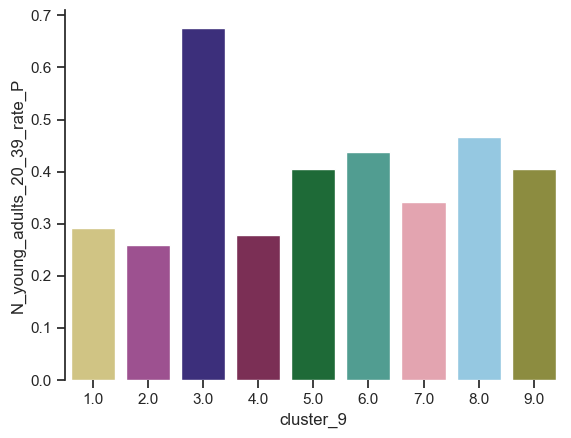

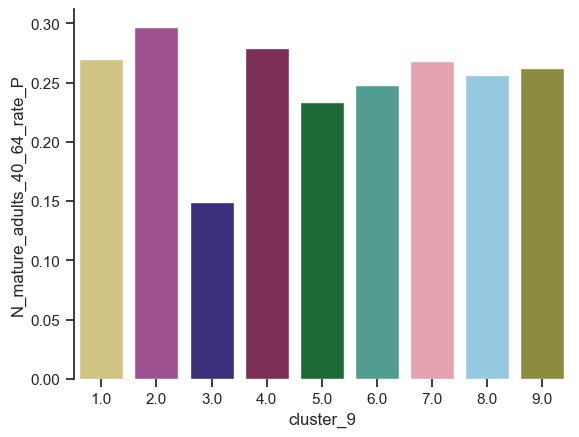

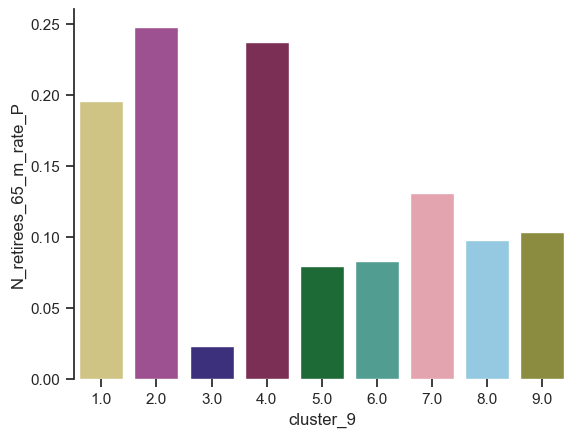

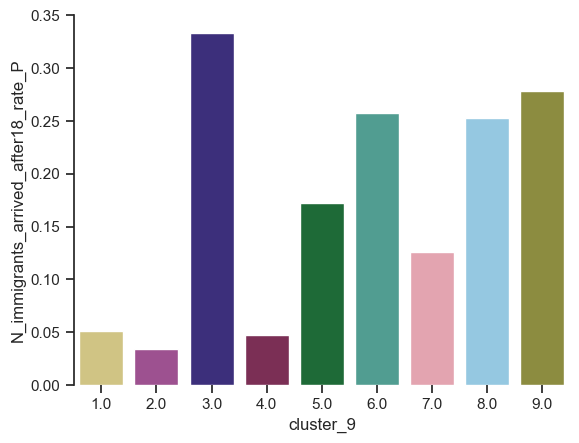

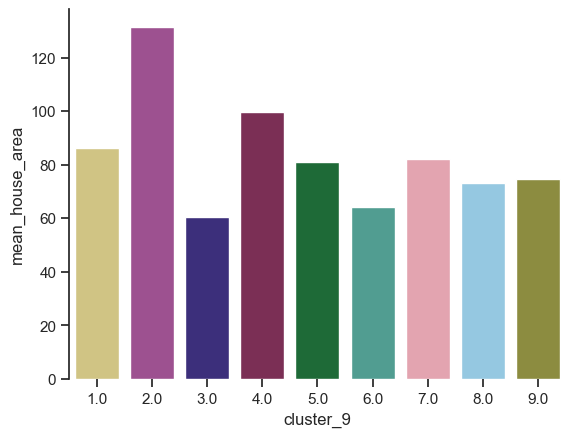

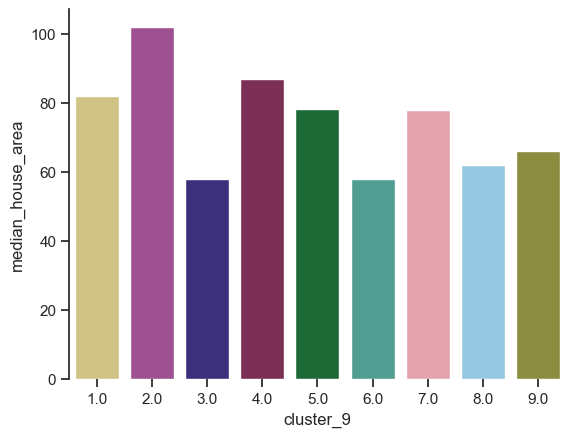

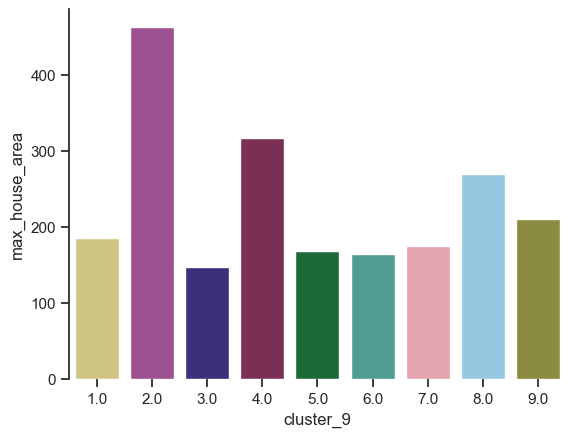

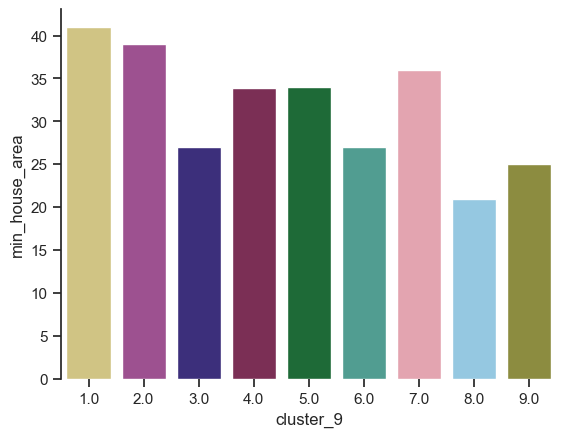

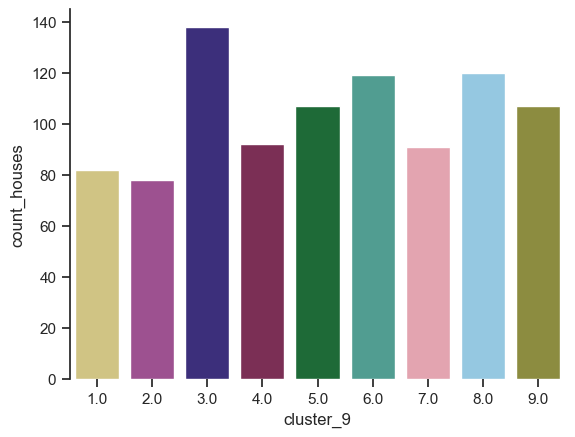

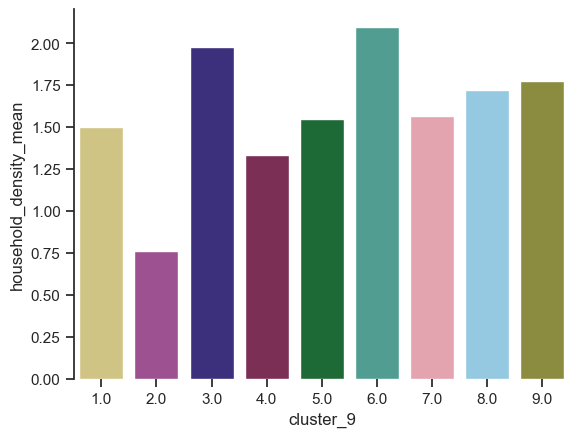

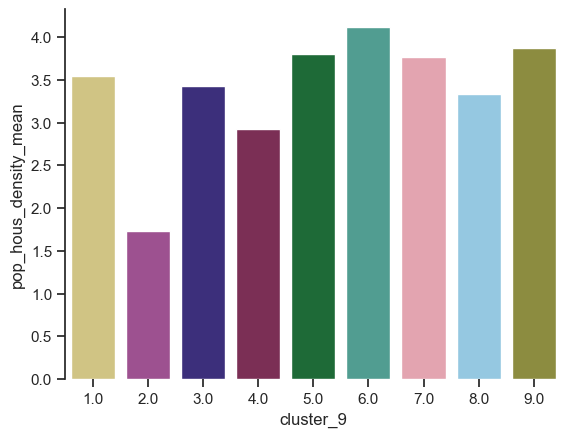

In [14]:
for i in grouped_data.columns[1:113]:
    sns.barplot(data = grouped_data[grouped_data.type == 'median'],x='cluster_9',y=i, palette = color_list)
    plt.show();

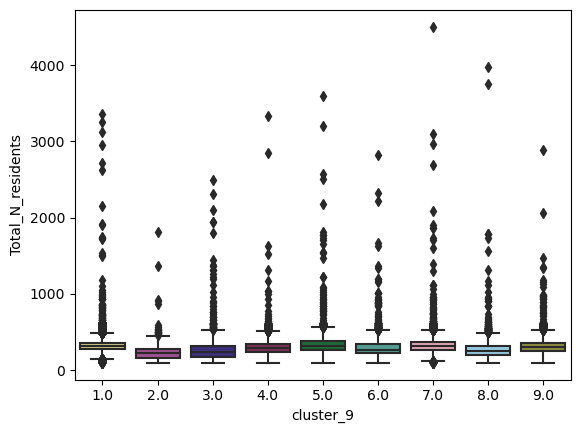

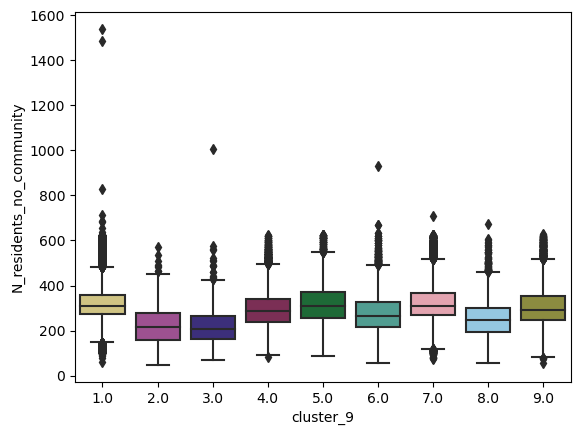

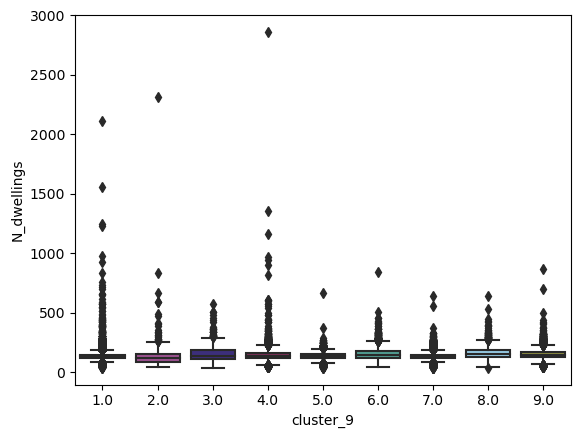

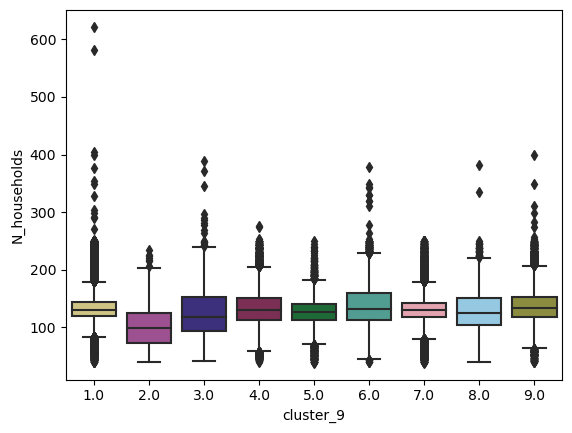

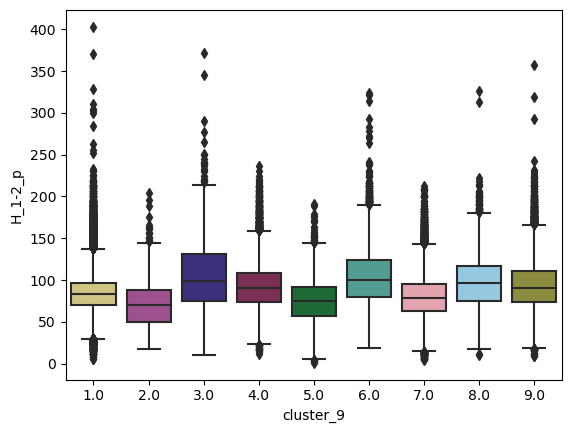

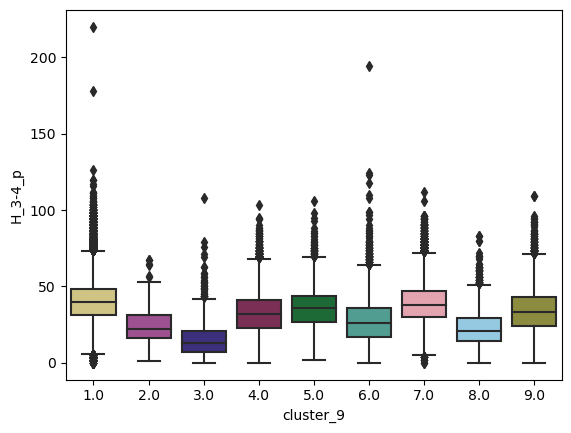

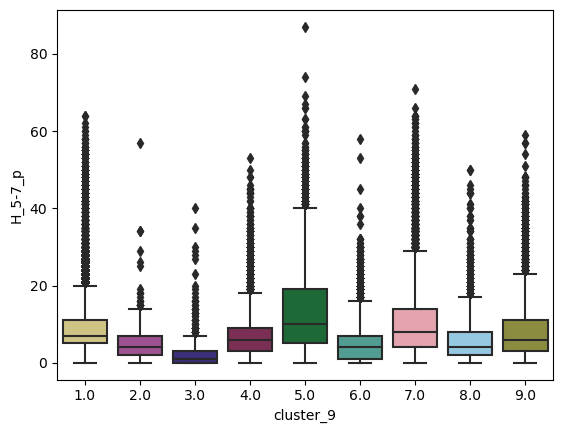

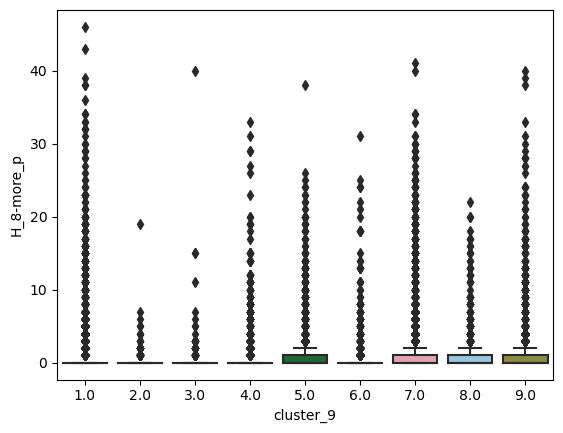

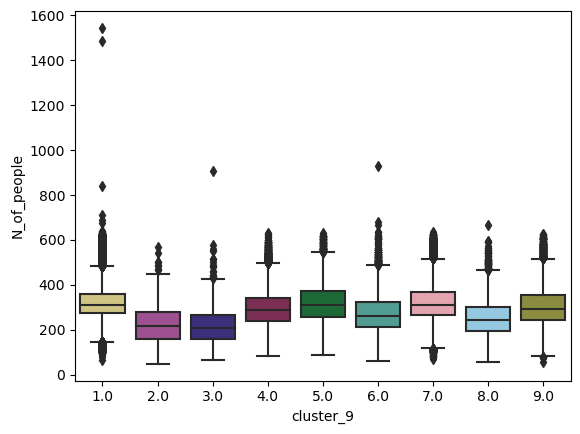

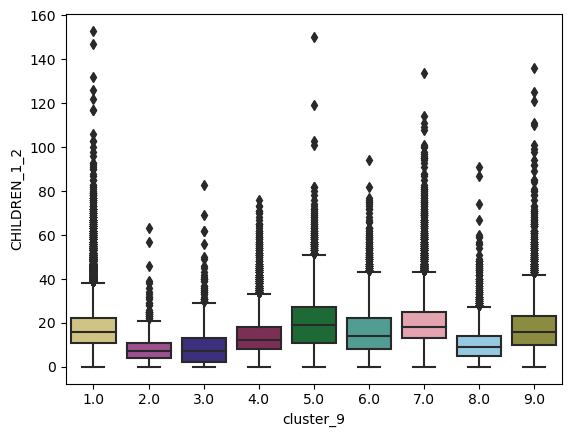

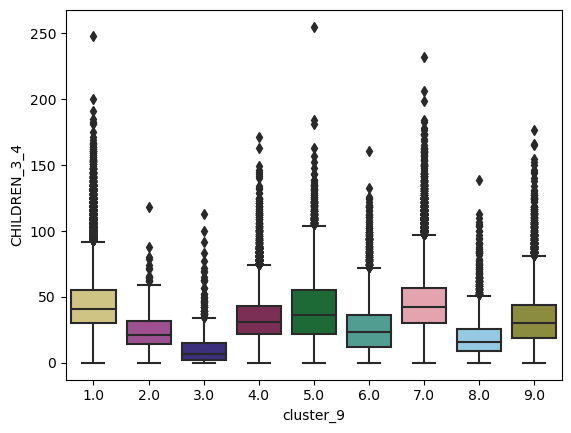

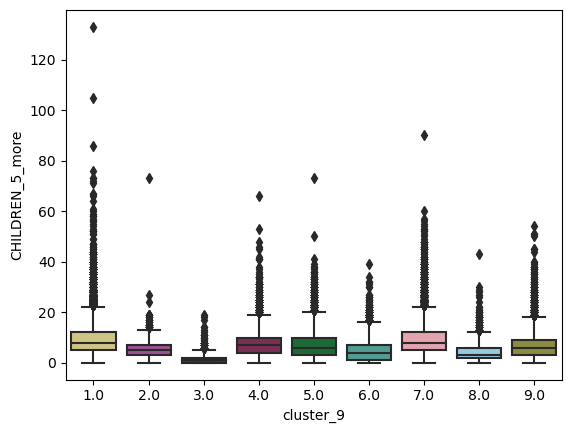

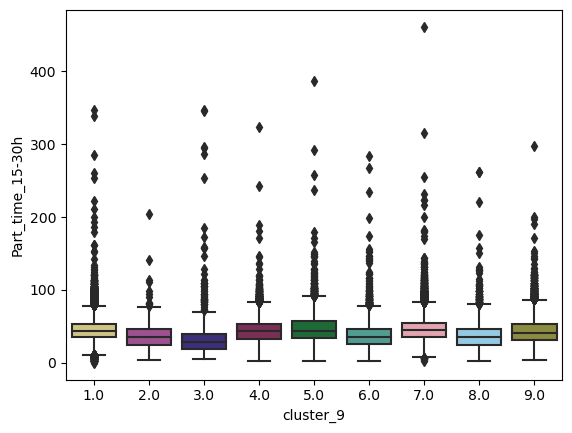

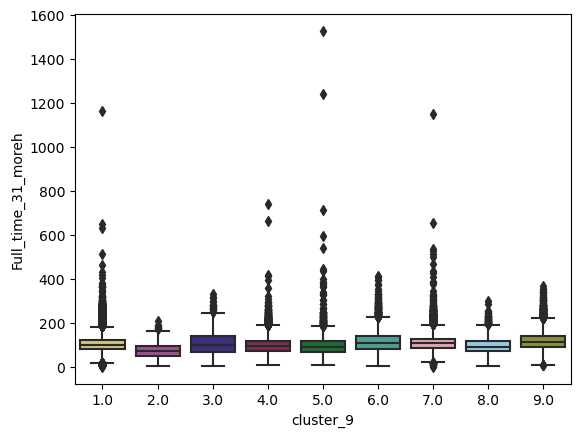

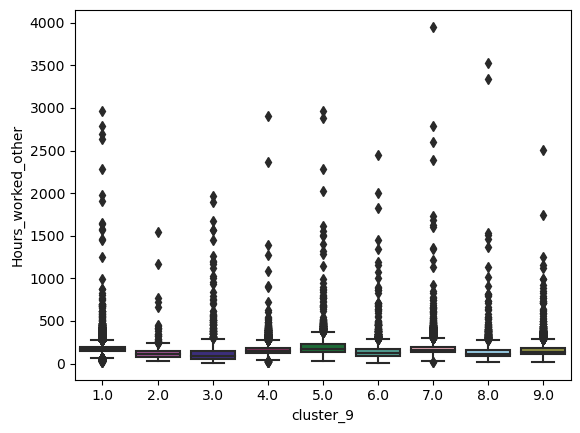

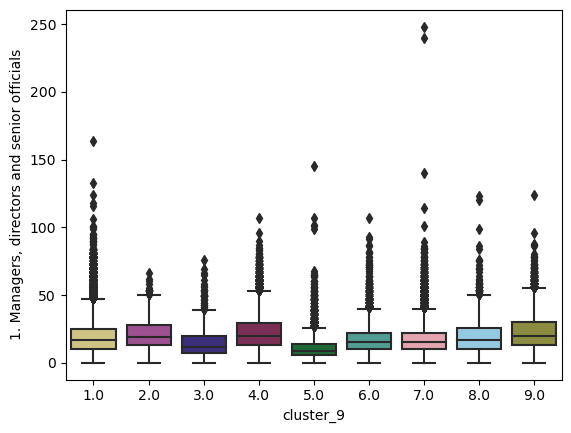

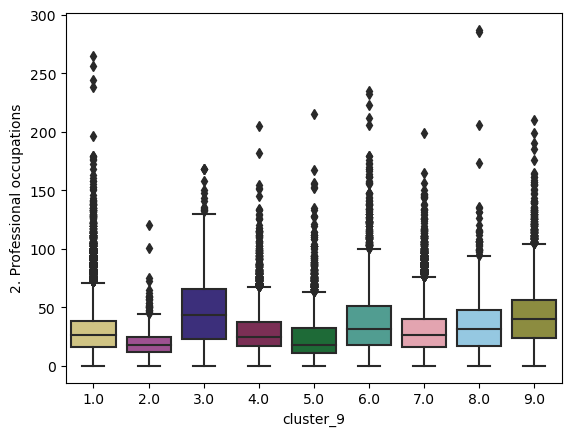

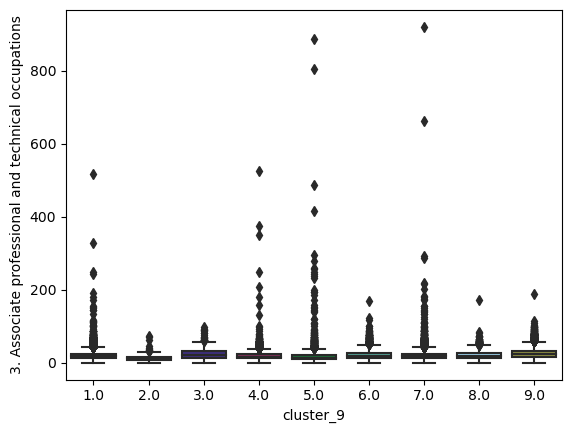

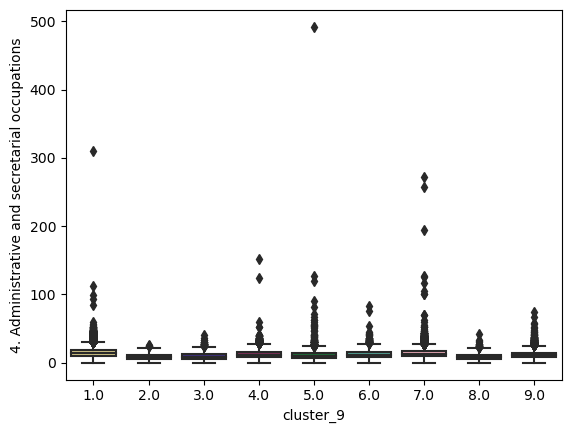

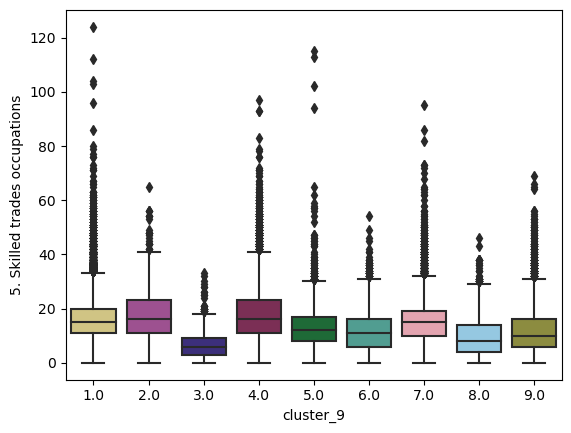

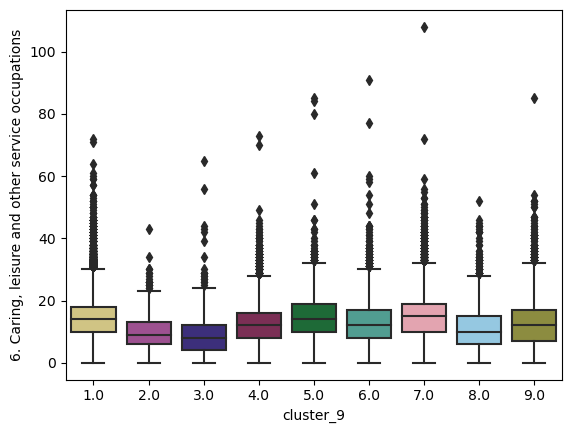

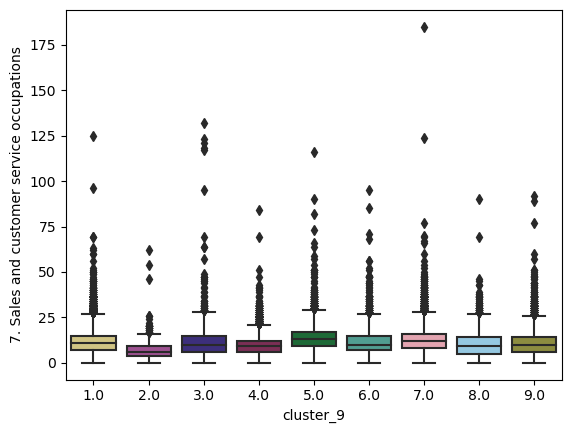

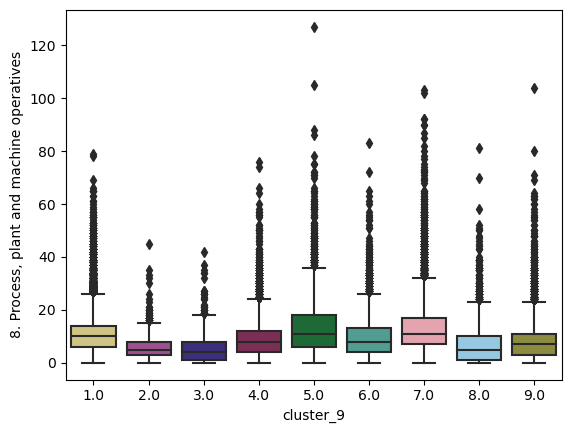

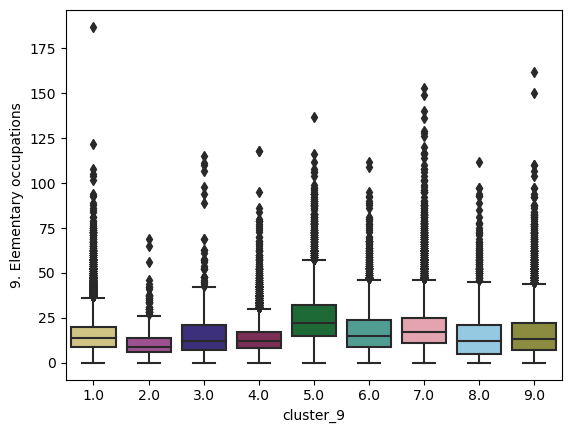

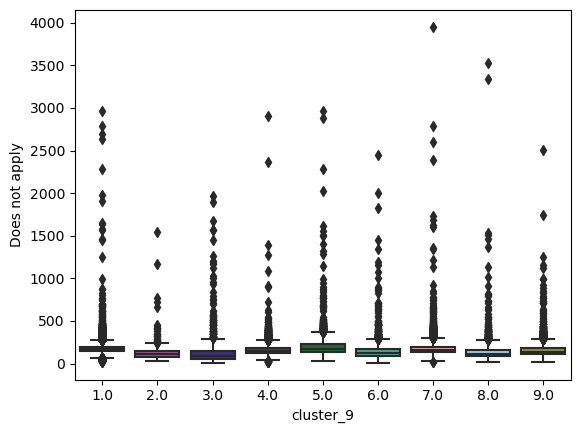

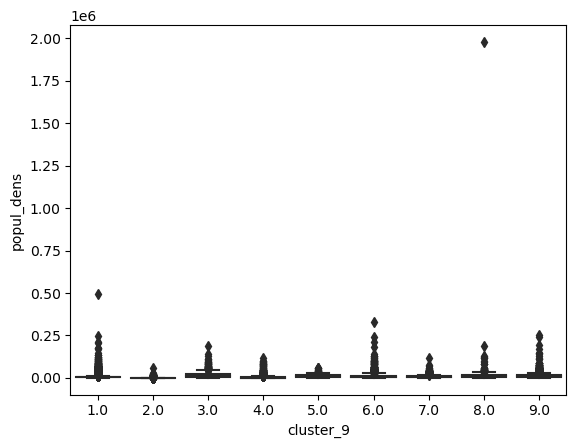

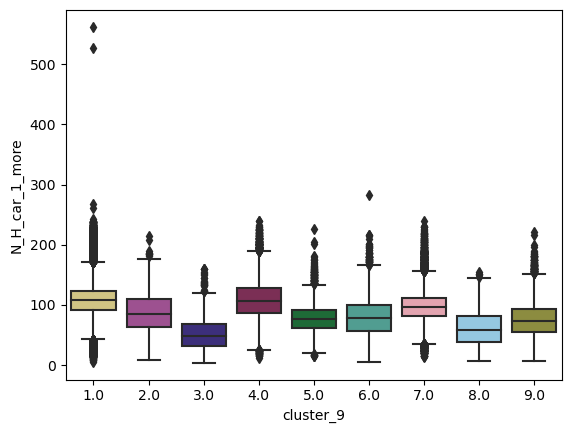

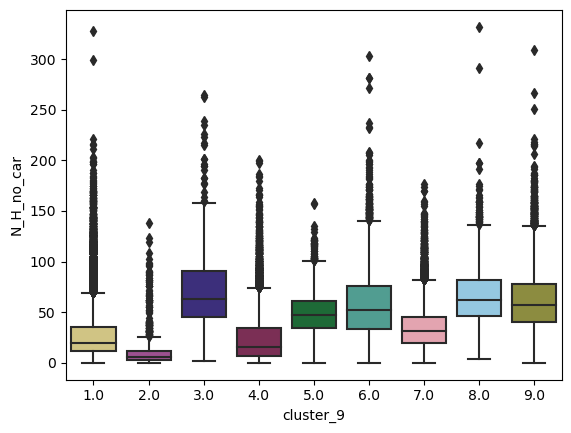

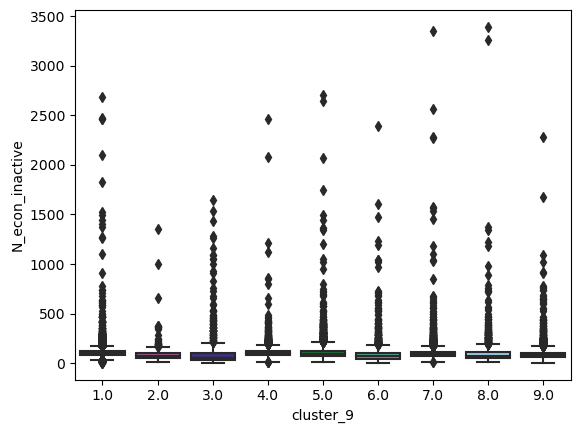

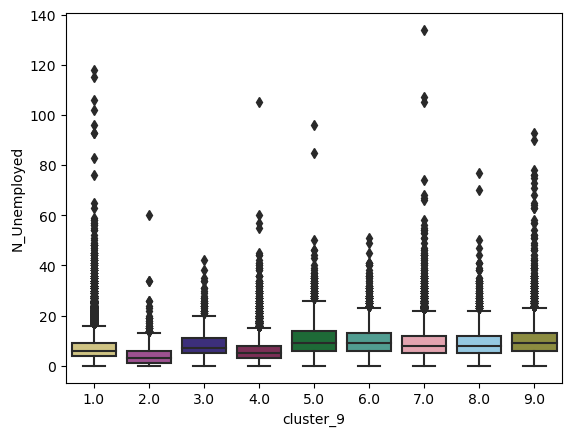

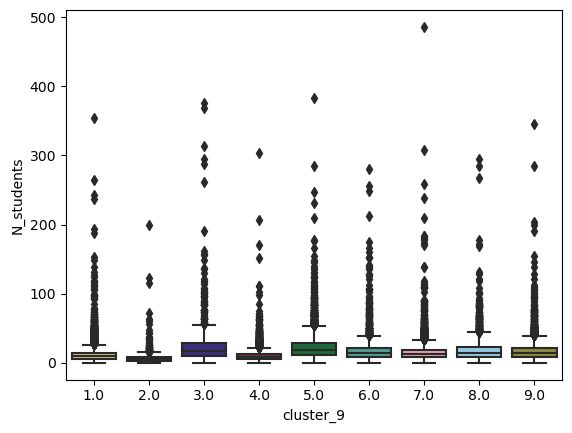

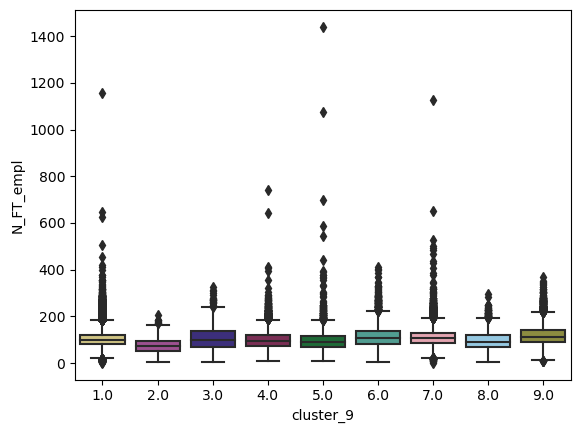

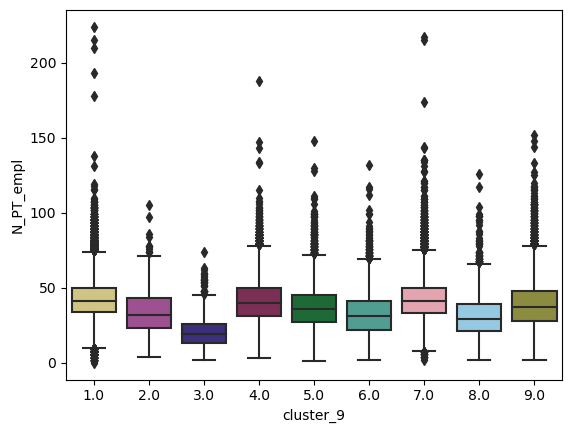

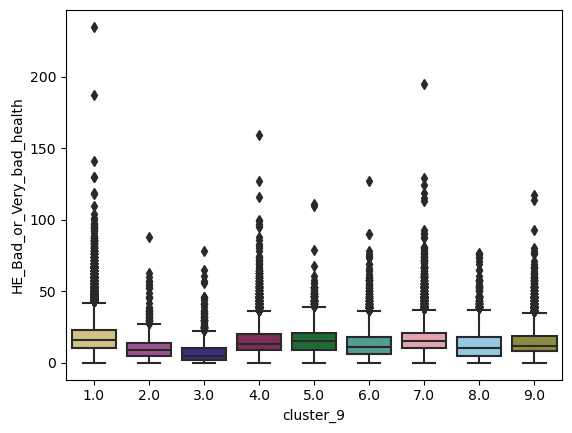

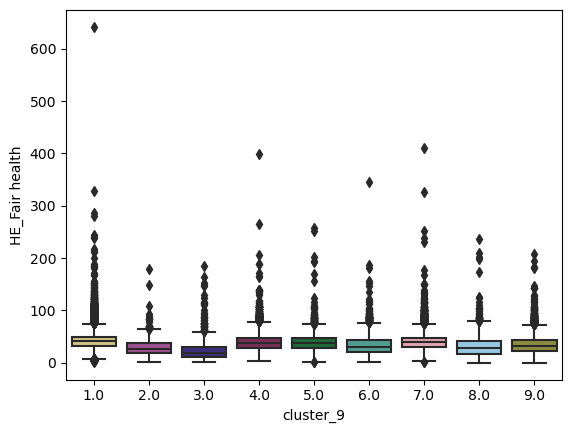

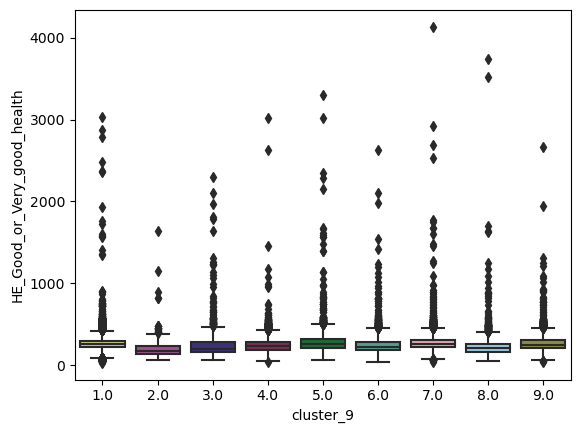

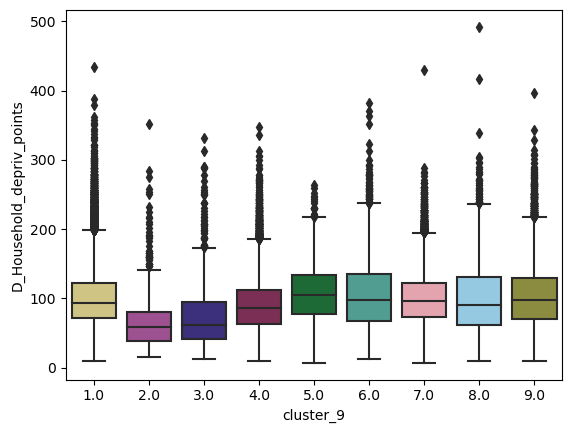

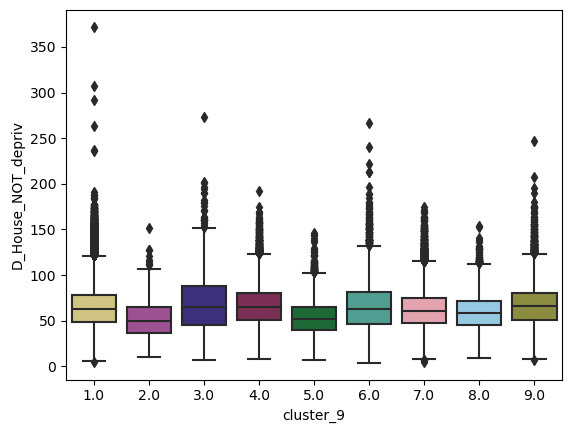

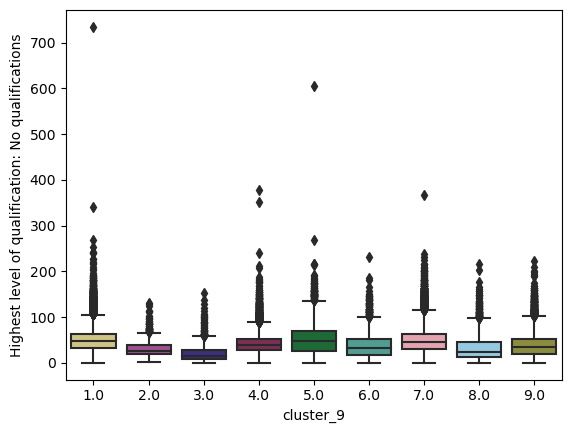

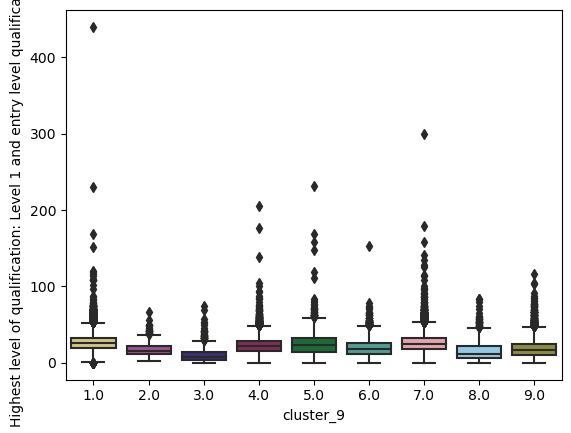

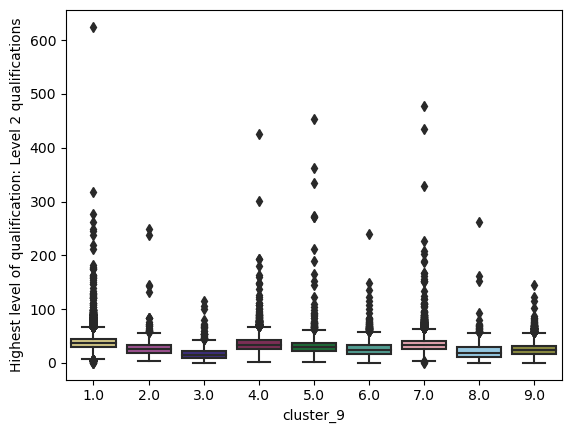

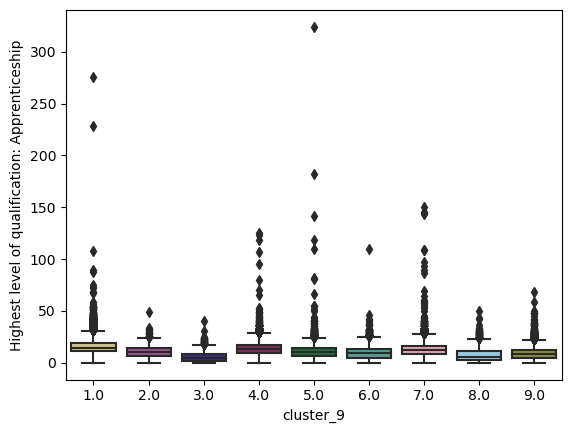

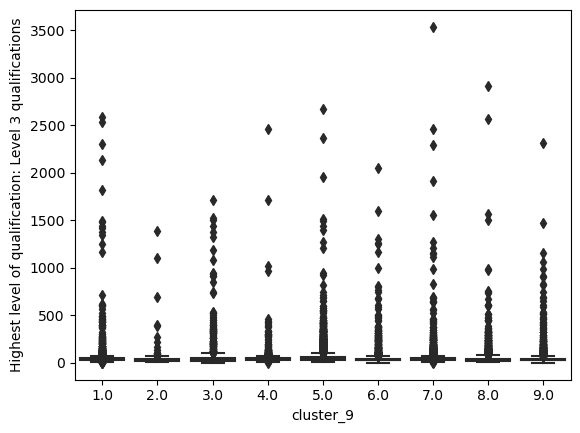

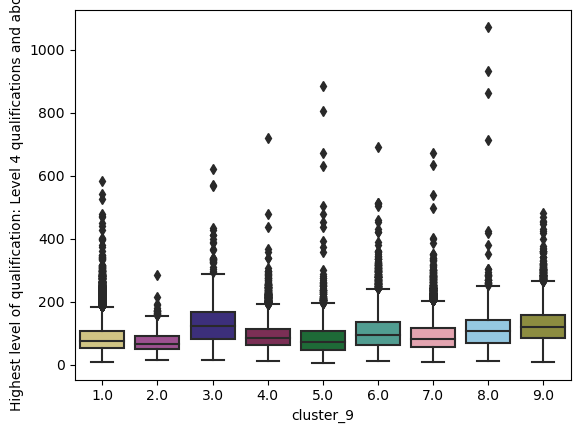

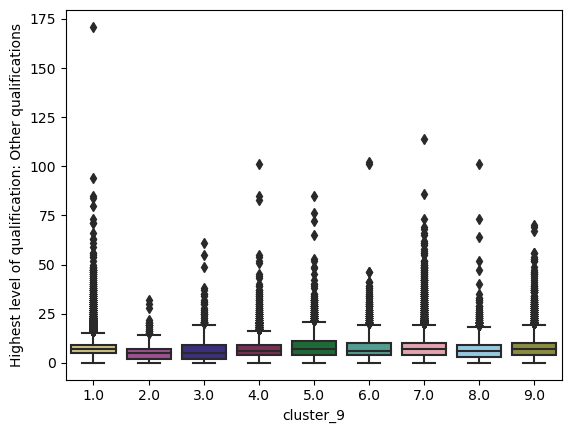

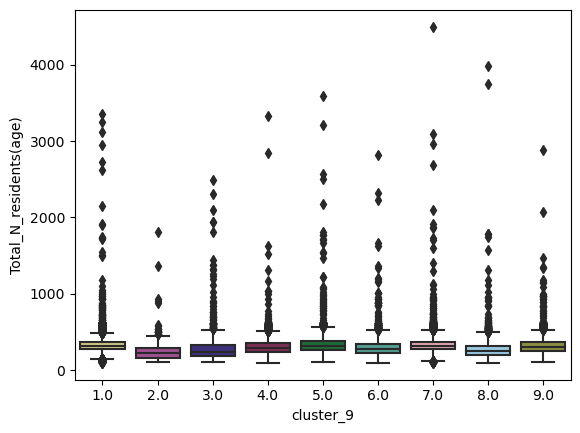

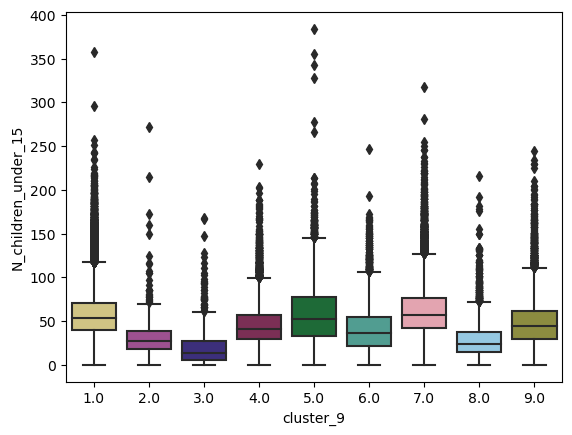

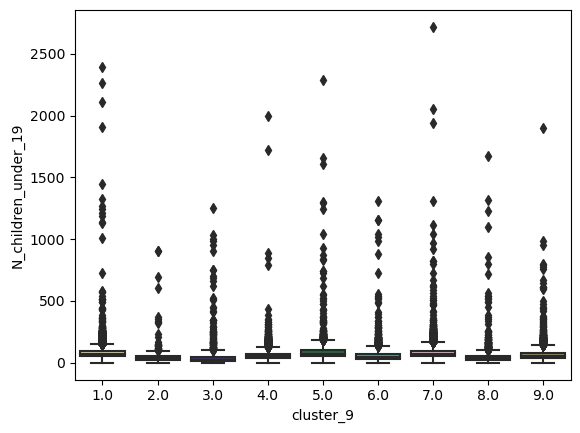

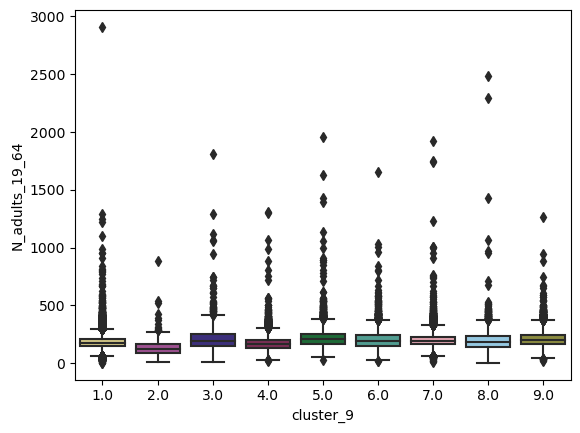

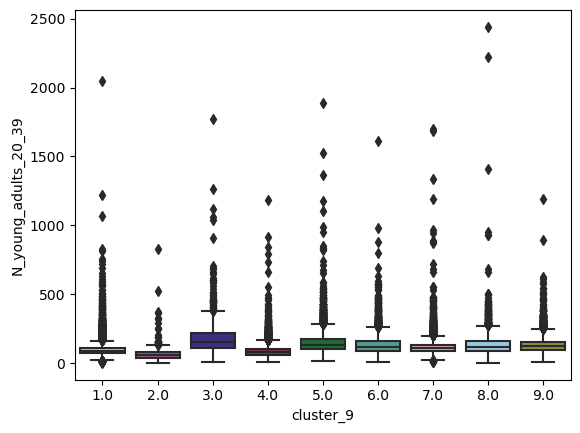

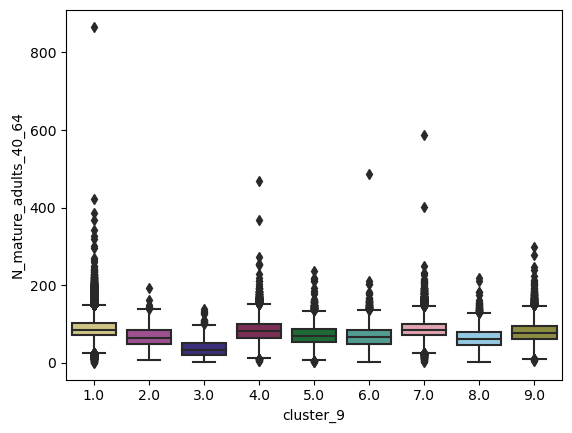

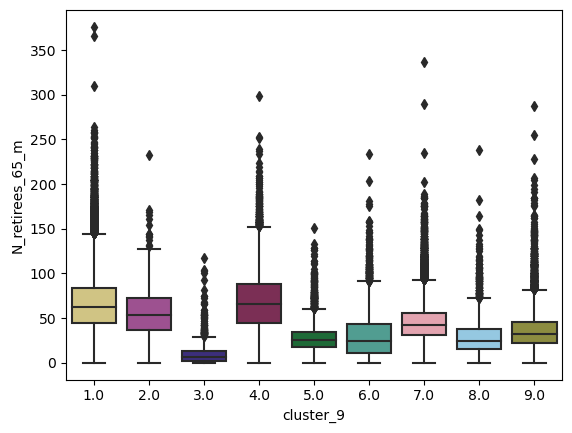

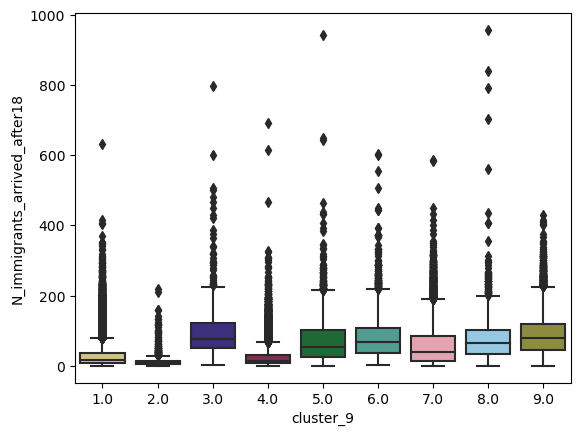

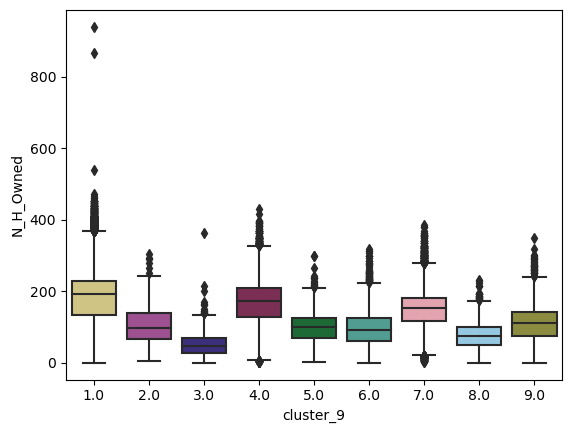

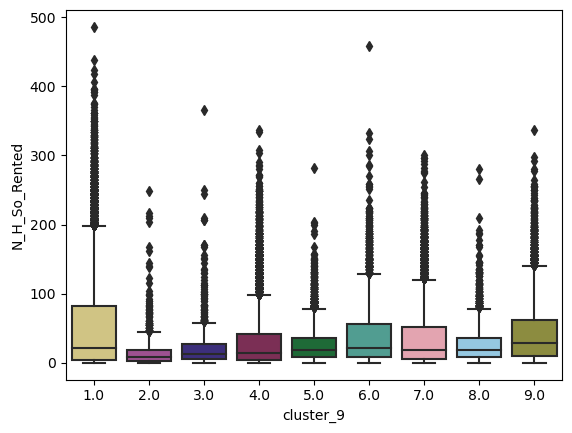

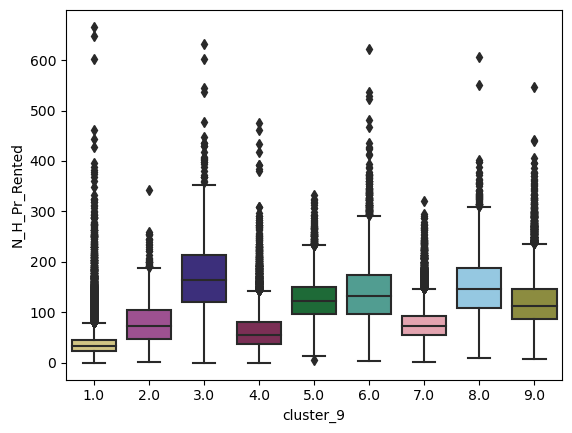

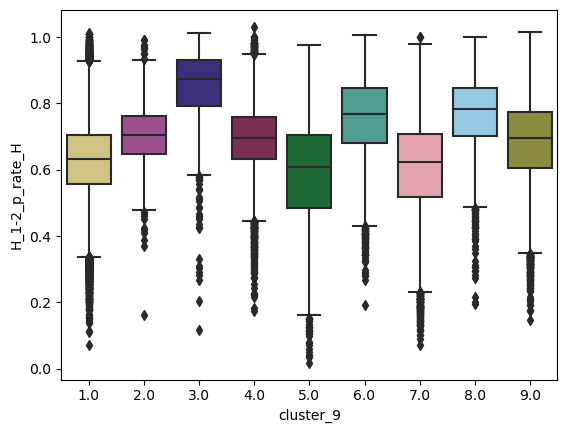

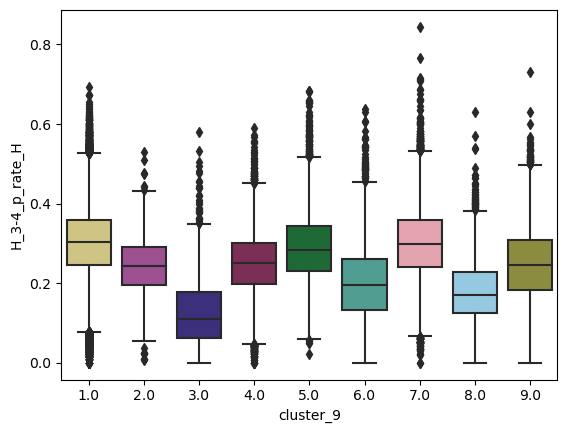

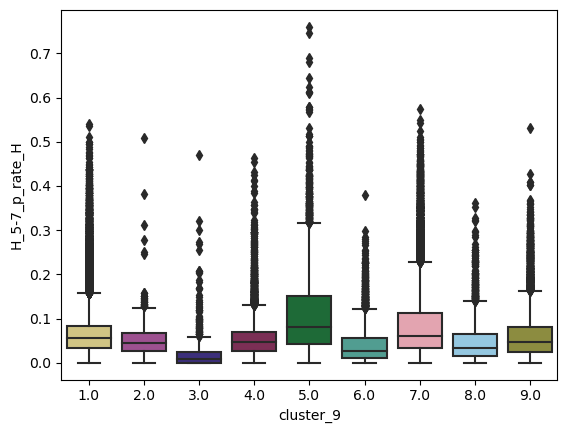

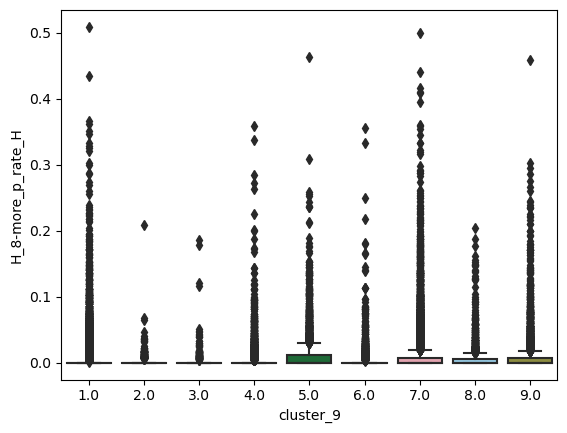

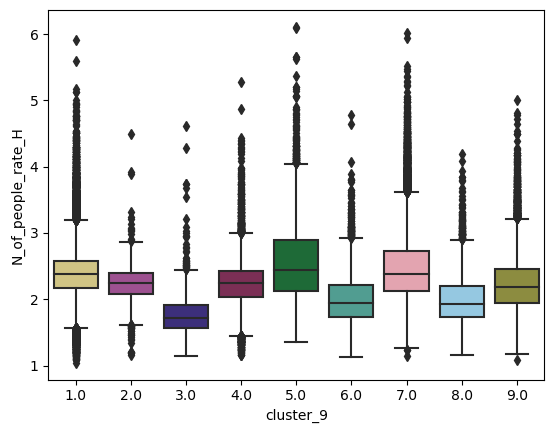

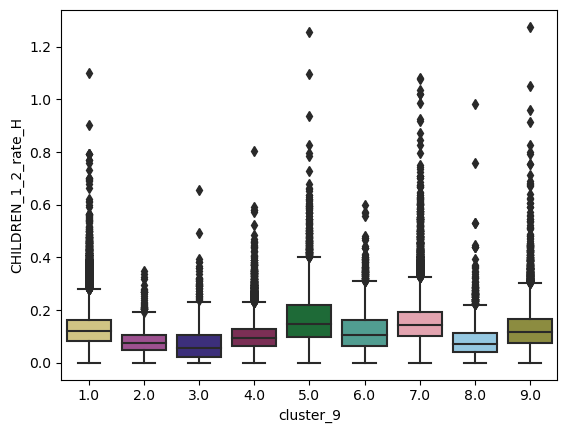

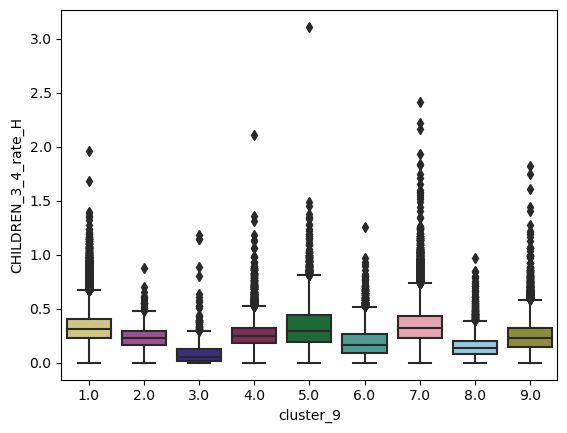

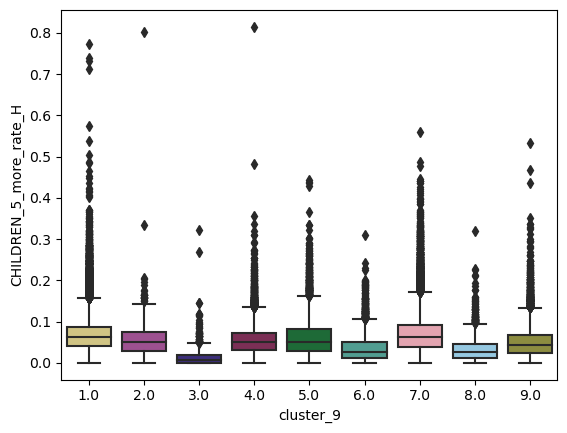

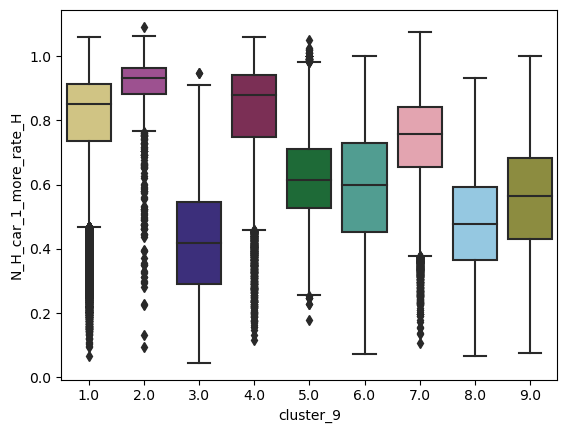

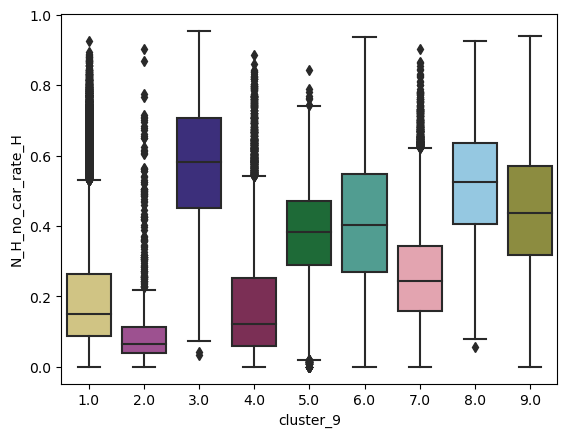

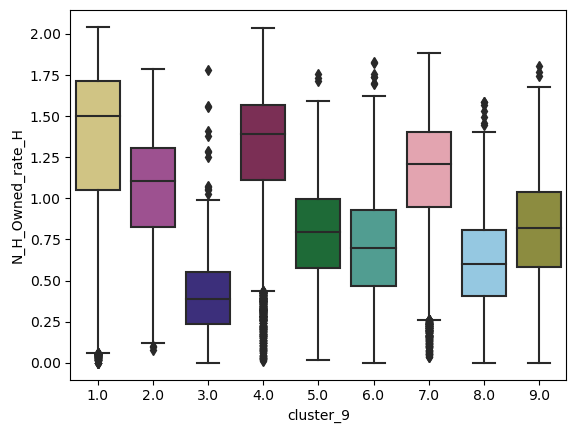

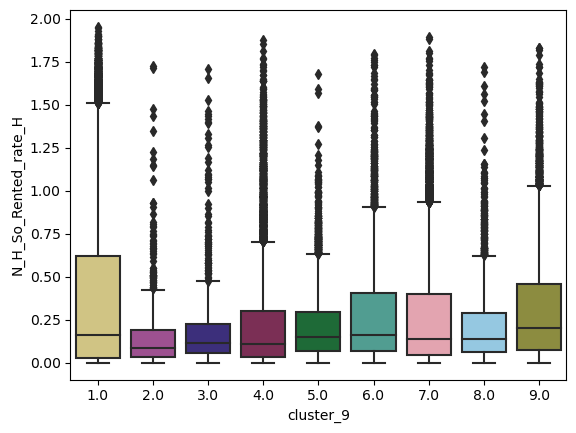

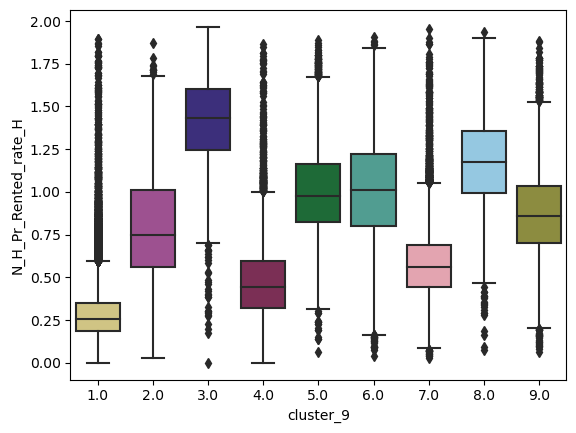

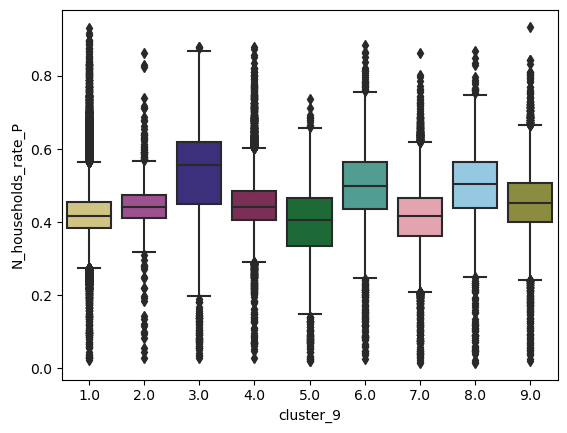

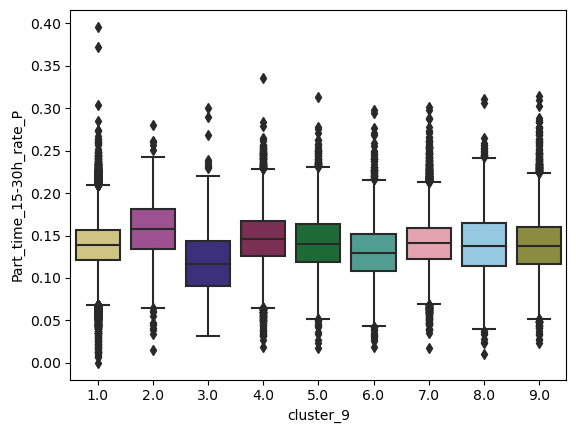

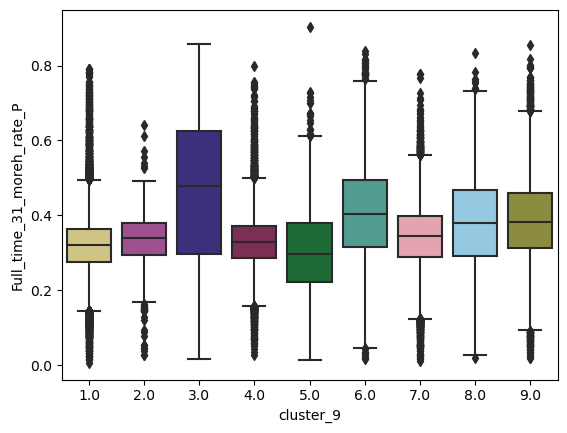

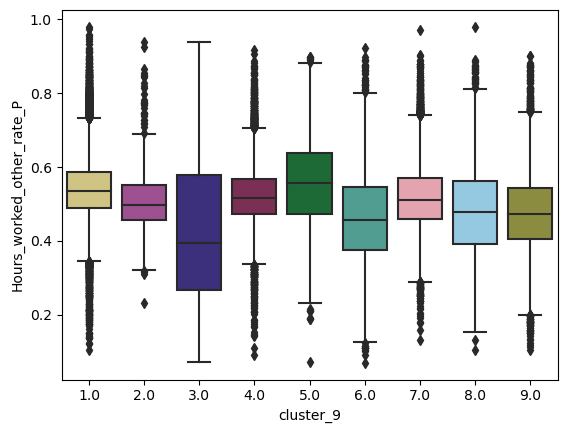

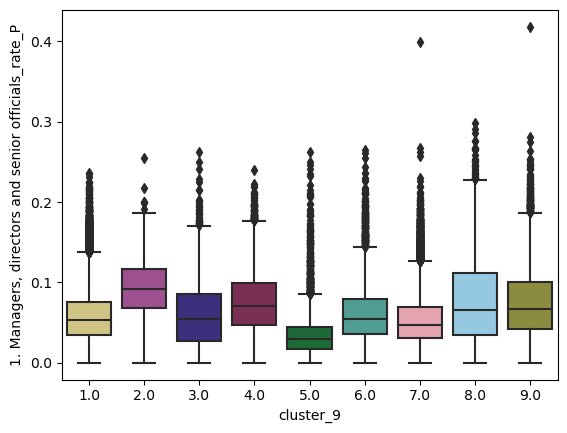

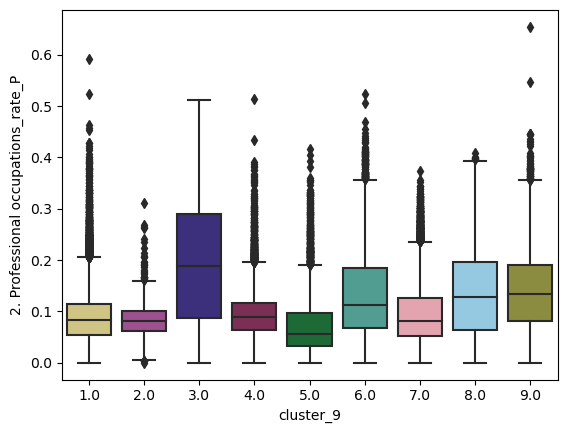

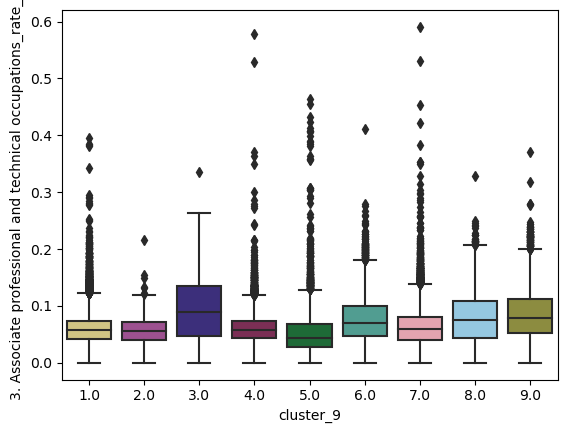

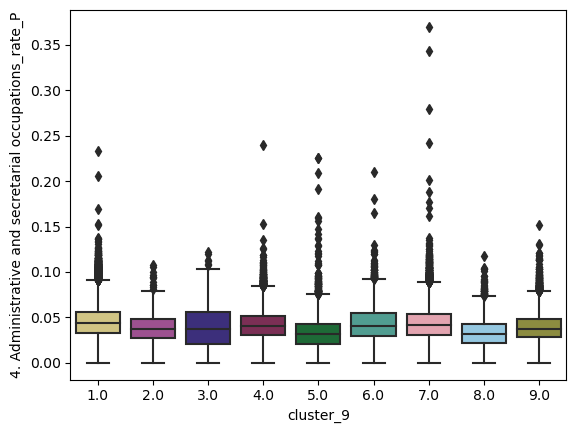

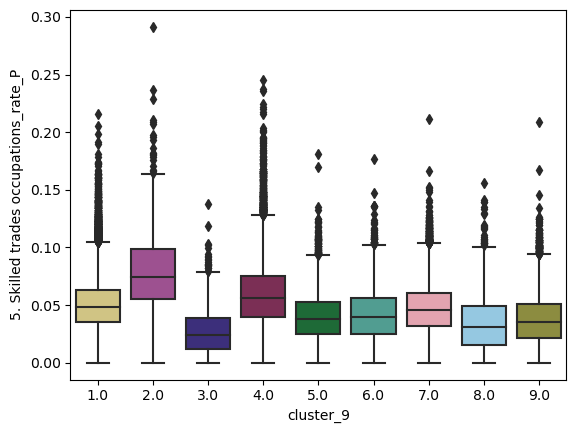

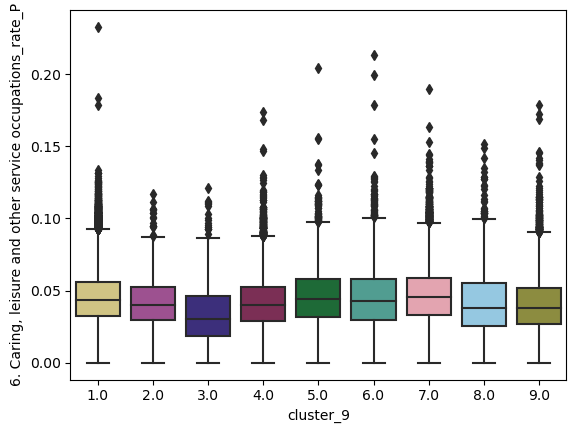

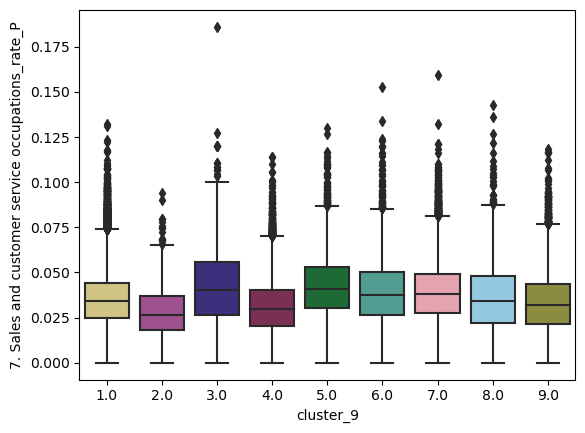

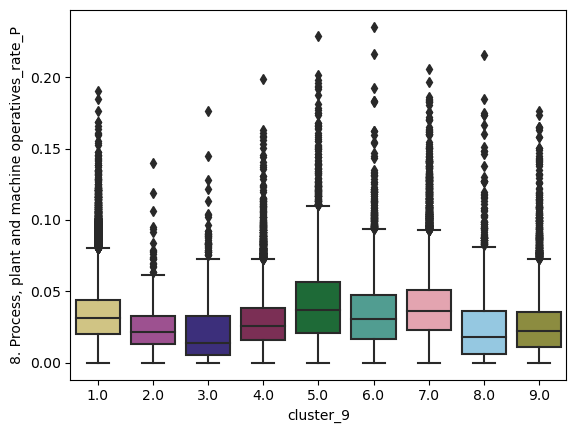

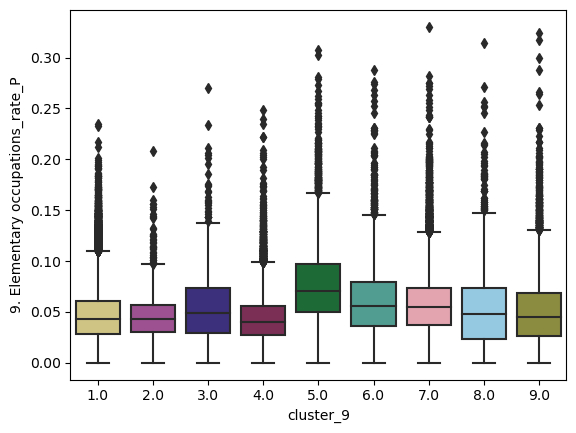

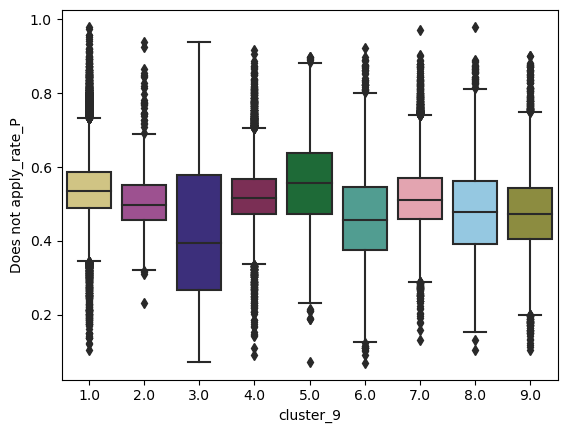

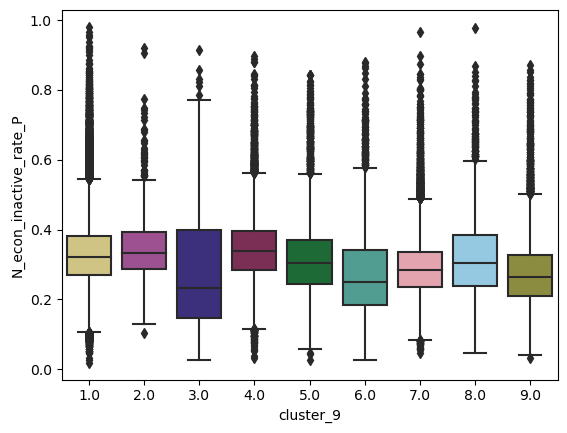

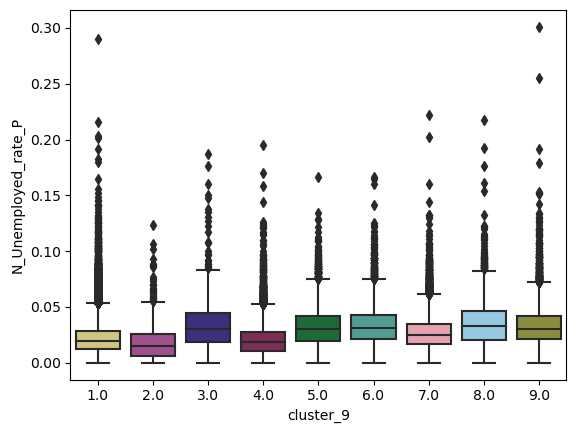

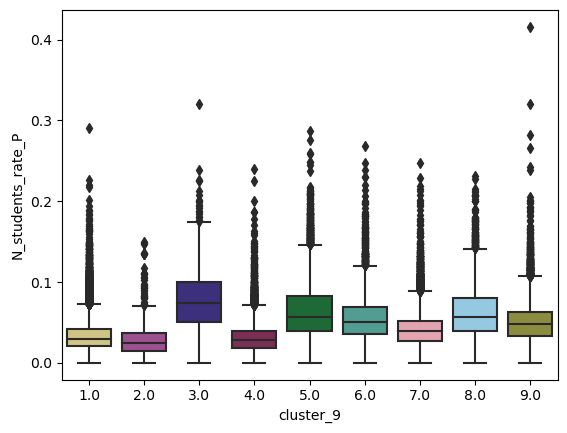

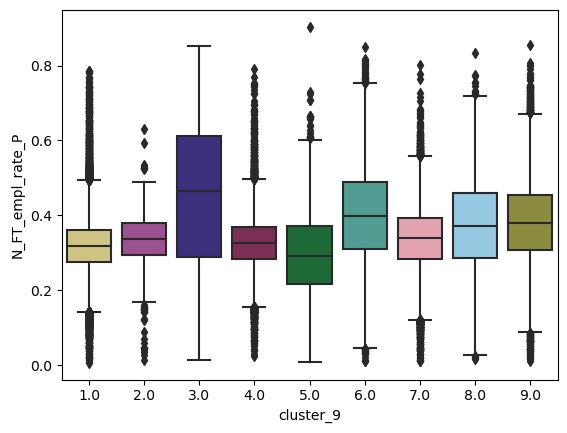

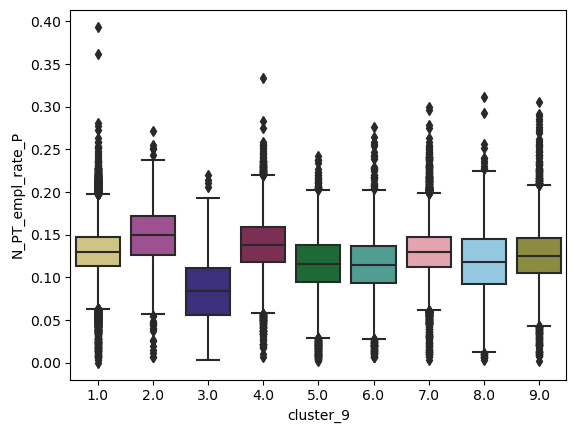

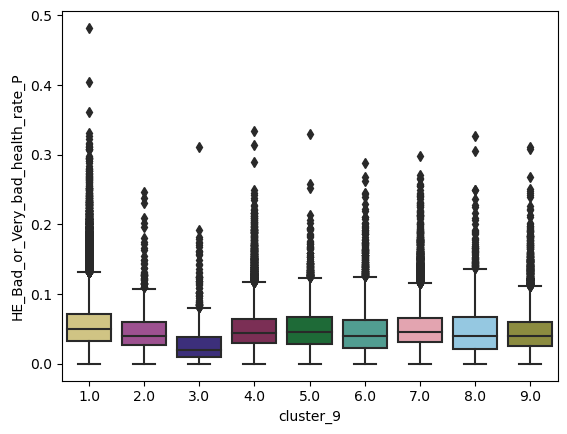

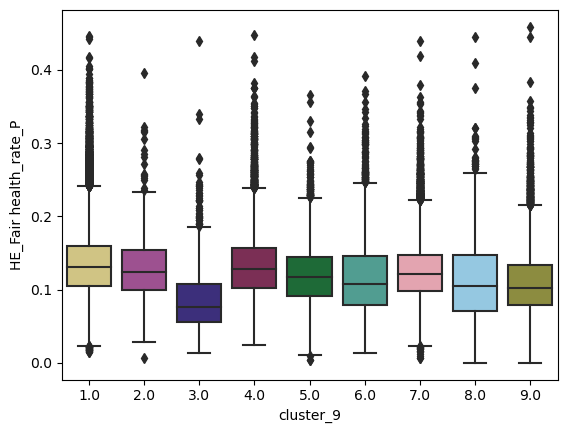

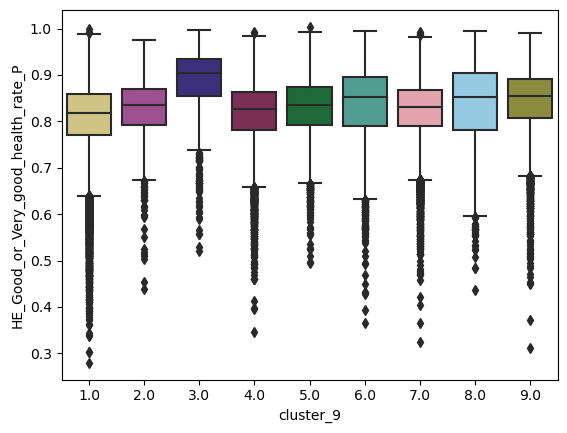

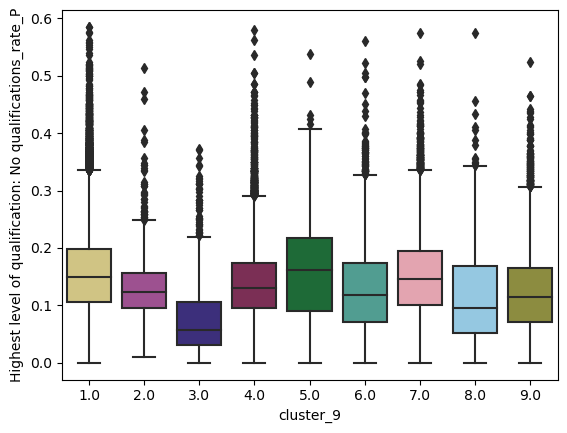

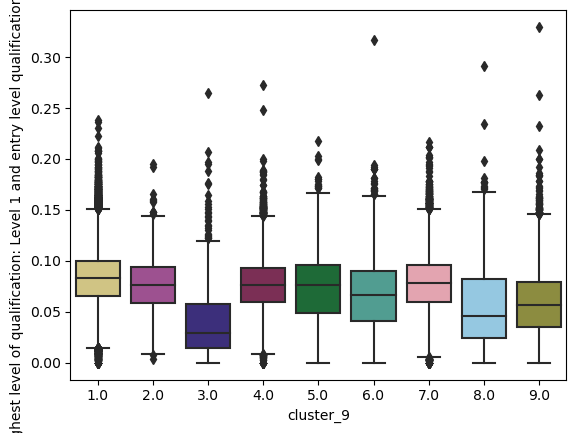

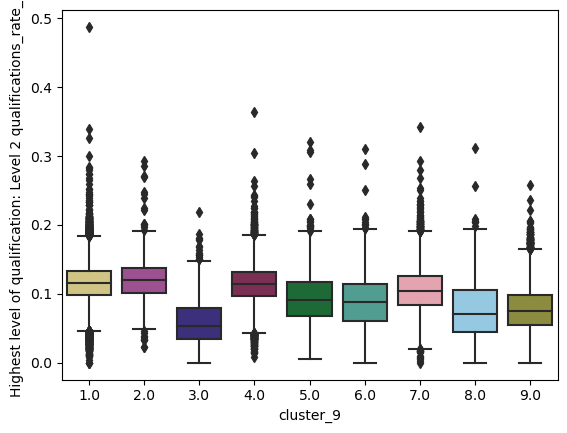

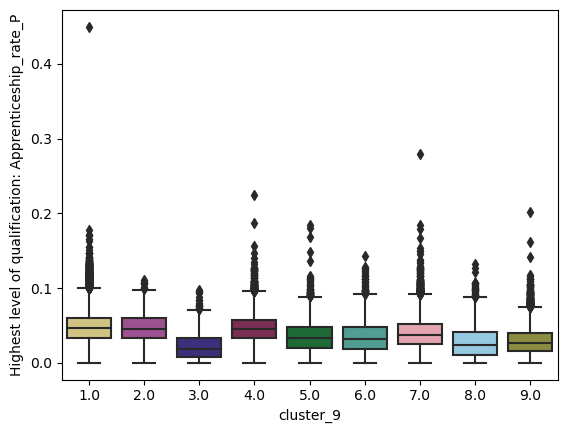

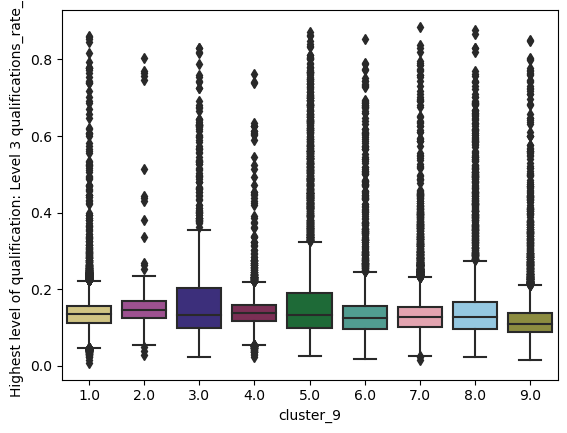

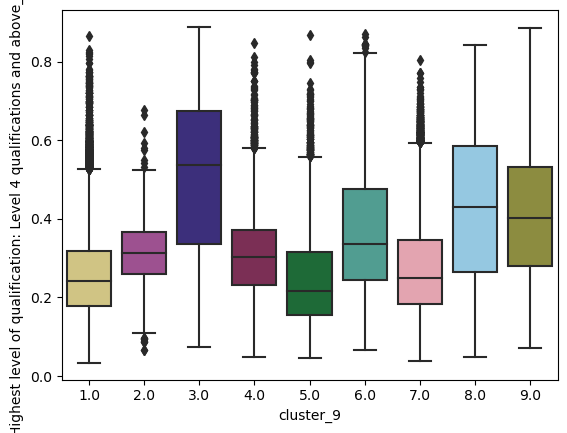

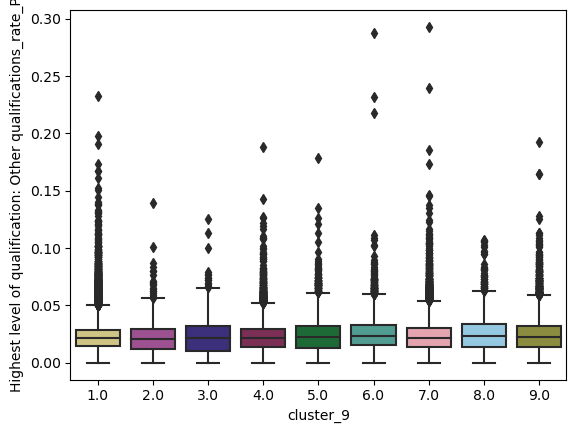

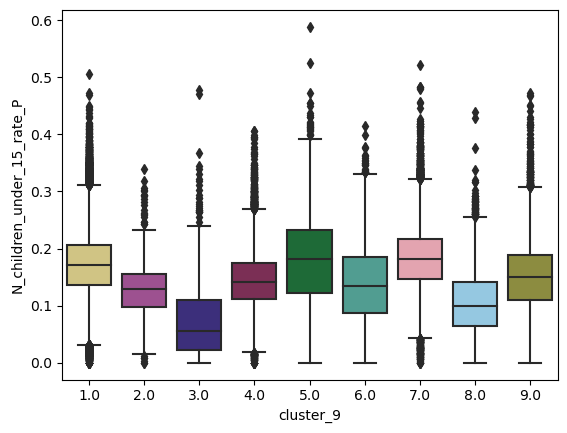

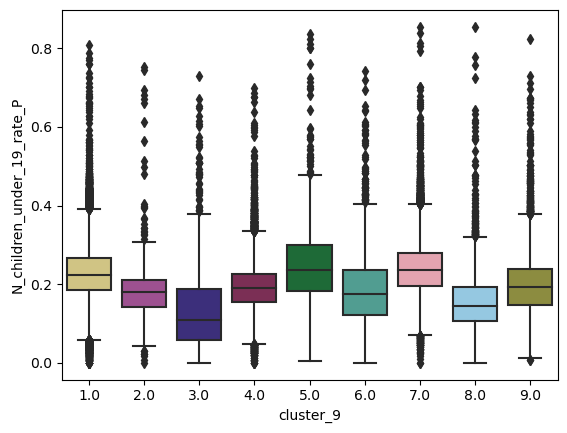

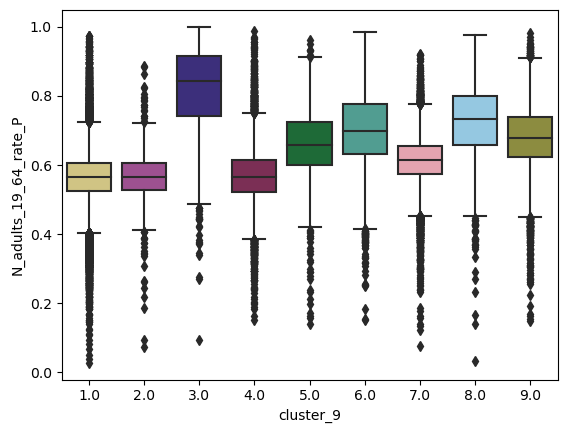

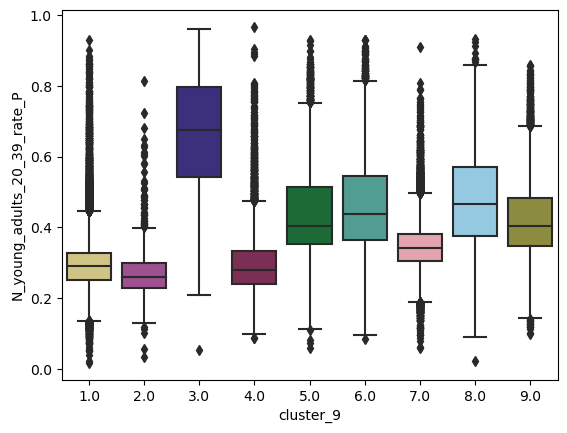

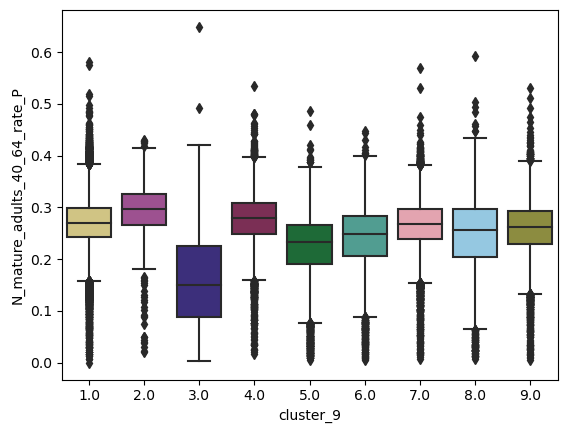

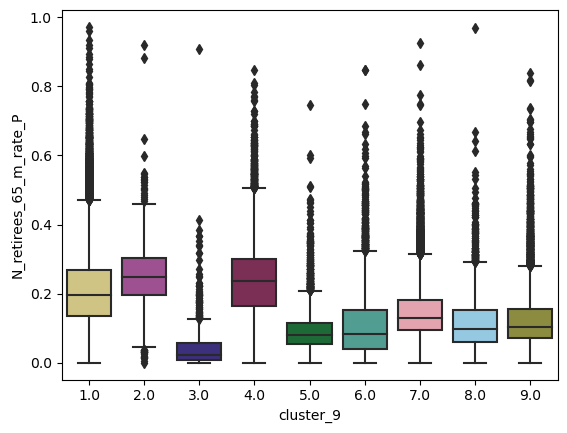

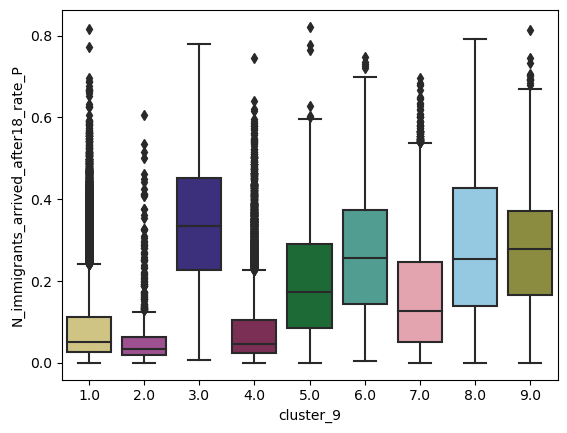

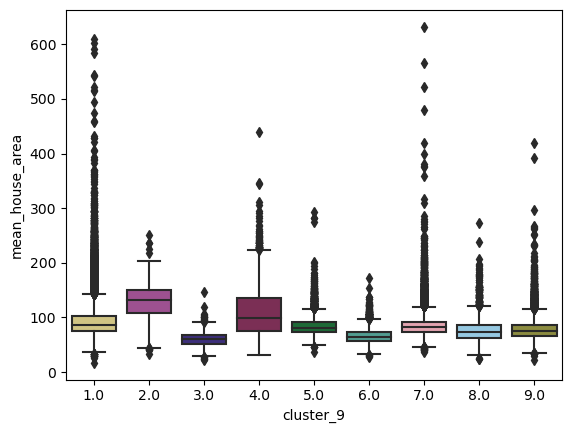

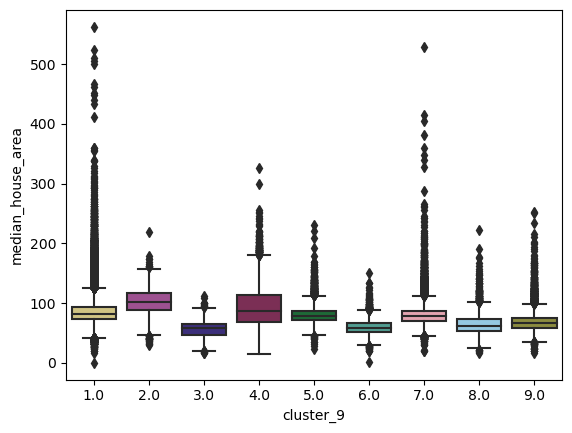

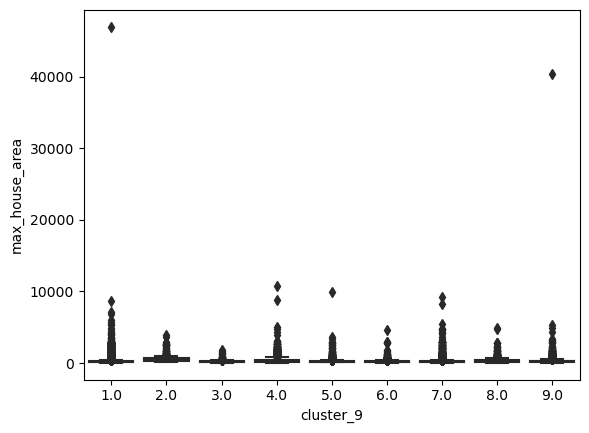

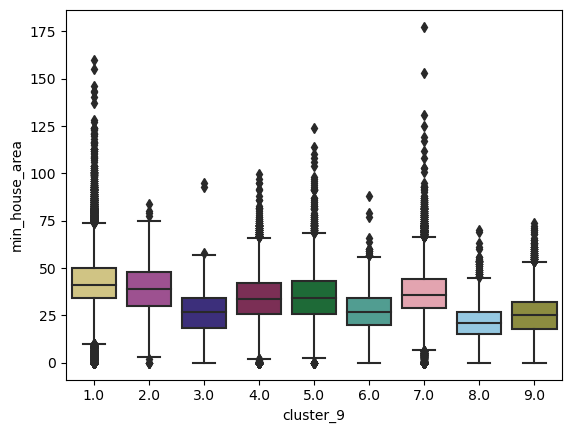

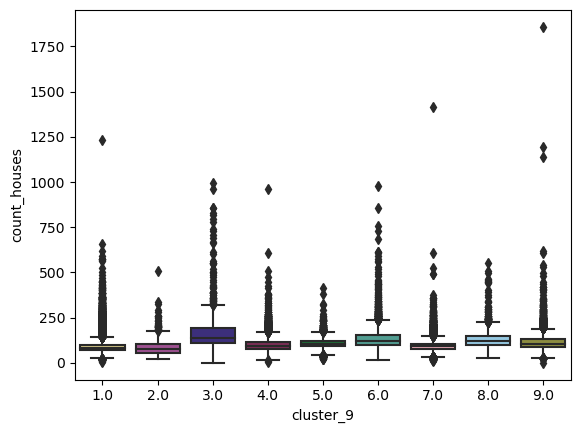

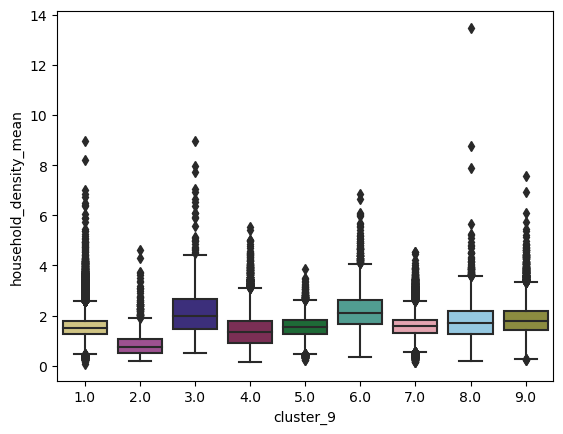

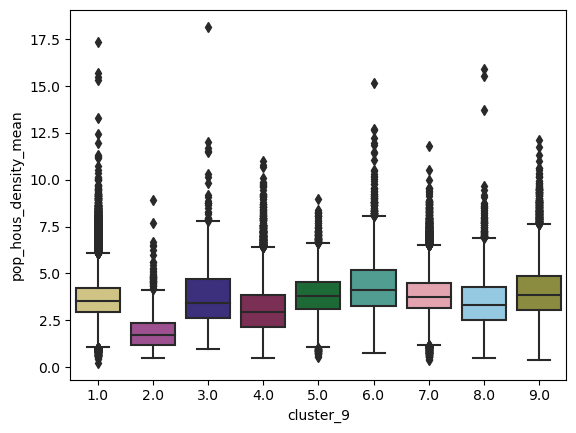

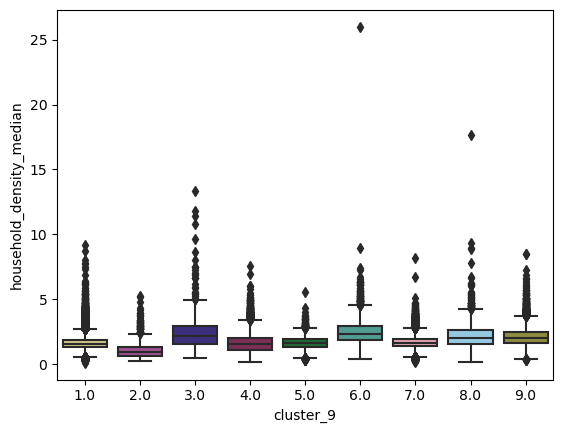

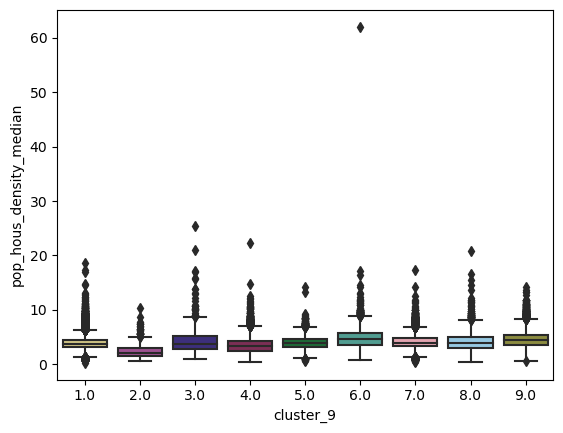

KeyError: 'type'

In [10]:
for i in list2:
    sns.boxplot(x=data['cluster_9'],y=data[i],palette=color_list)
    plt.show()

In [11]:
census_var_fr = data.groupby(['cluster_9']).count()['N_households']
epc_var_fr = data.groupby(['cluster_9']).count()['household_density_mean']
test = pd.DataFrame({'census' : census_var_fr,'epc' : epc_var_fr}).reset_index()
test['cluster_9'] = test['cluster_9'].astype(int)
test['census'] = test['census'].astype(int)
test['epc'] = test['epc'].astype(int)


[Text(0.5, 0, 'Cluster number'), Text(0, 0.5, 'Number of OAs in each cluster')]

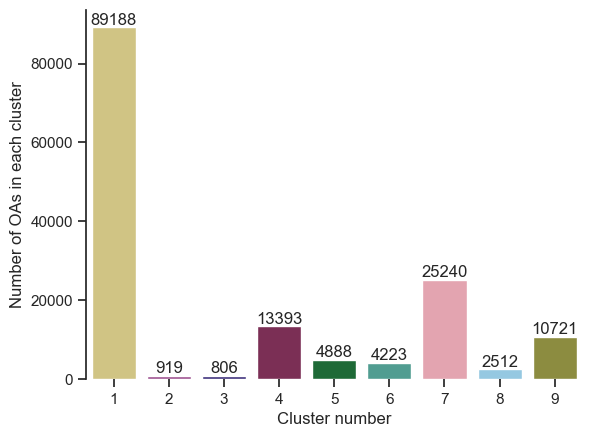

In [12]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False,  "axes.spines.bottom": False}
sns.set_theme(style="ticks", rc=custom_params)

ax = sns.barplot(data=test, x=test['cluster_9'],y=test['census'],palette=color_list)
ax.bar_label(ax.containers[0], fmt='%.0f')
ax.set(xlabel = 'Cluster number', ylabel = 'Number of OAs in each cluster')

[Text(0.5, 0, 'Cluster number'),
 Text(0, 0.5, 'Number of OAs with availiable EPCs')]

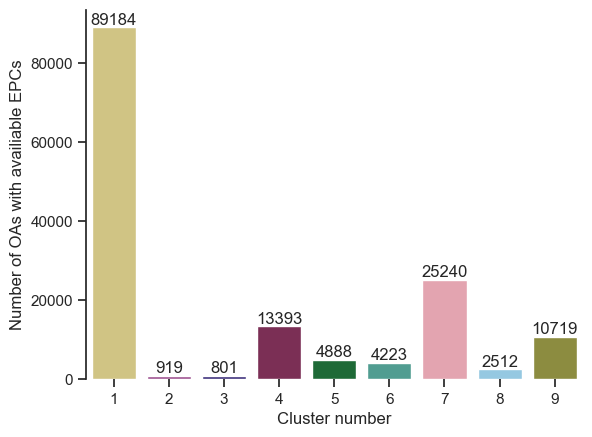

In [13]:

ay = sns.barplot(data=test, x=test['cluster_9'],y=test['epc'],palette=color_list)
ay.bar_label(ay.containers[0], fmt='%.0f')
ay.set(xlabel = 'Cluster number', ylabel = 'Number of OAs with availiable EPCs')

In [66]:
pie = test.copy()

In [69]:
new_row =  pd.DataFrame({'cluster_9':[0],'census':[0],'epc':[pie['census'].sum()-pie['epc'].sum()]}, index=[9])
pie = pd.concat([pie,new_row])

In [71]:

pie['perc_cens'] = round((pie['census']/pie['census'].sum())*100,1)
pie['perc_epc'] = round((pie['epc']/pie['census'].sum())*100,1)
pie

cluster_9  census    epc  perc_cens  perc_epc
0          1   89188  85760       58.7      56.5
1          2     919    863        0.6       0.6
2          3     806    798        0.5       0.5
3          4   13393  12746        8.8       8.4
4          5    4888   4747        3.2       3.1
5          6    4223   4149        2.8       2.7
6          7   25240  24535       16.6      16.2
7          8    2512   2479        1.7       1.6
8          9   10721  10460        7.1       6.9
9          0       0   5353        0.0       3.5

In [100]:
color_list

{1: '#ddcc77',
 2: '#aa4499',
 3: '#332288',
 4: '#882255',
 5: '#117733',
 6: '#44aa99',
 7: '#ee99aa',
 8: '#88ccee',
 9: '#999933'}

In [101]:
col_list2 = [color_list[1],color_list[2],color_list[3],color_list[4],color_list[5],color_list[6],color_list[7],color_list[8],color_list[9],'grey']

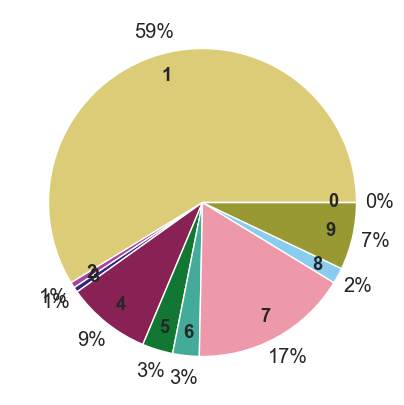

In [102]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(5, 5))

patches, texts, autotexts = plt.pie(pie['census'], labels=pie['cluster_9'],colors = col_list2, autopct='%.0f%%',pctdistance=1.15,labeldistance=0.85)
for text in texts:
    text.set_fontweight('bold')
    text.set_horizontalalignment('center')

plt.show();

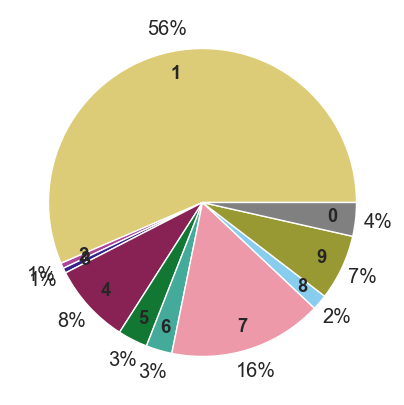

In [103]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(5, 5))

patches, texts, autotexts = plt.pie(pie['epc'], labels=pie['cluster_9'],colors = col_list2, autopct='%.0f%%',pctdistance=1.15,labeldistance=0.85)
for text in texts:
    text.set_fontweight('bold')
    text.set_horizontalalignment('center')

plt.show();

In [104]:
data_copy = data.copy()
for i in list2[0:5]:
    data_copy[i] = pd.qcut(data_copy[i], 5, labels=["low","below average" ,"average", "above average","high"])
for i in list2[6:46]:
    data_copy[i] = pd.qcut(data_copy[i], 5, labels=["low","below average" ,"average", "above average","high"])

ValueError: Bin edges must be unique: array([ 0.,  0.,  0.,  0.,  1., 46.]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [143]:
data_copy.iloc[:,17:27]

1. Managers, directors and senior officials  \
0                                                 7   
1                                                10   
2                                                 8   
3                                                20   
4                                                 3   
...                                             ...   
151885                                           13   
151886                                            7   
151887                                            8   
151888                                           17   
151889                                            6   

        2. Professional occupations  \
0                                 3   
1                                17   
2                                12   
3                                29   
4                                15   
...                             ...   
151885                            6   
151886                            9   
151887                           10   
151888                           29   
151889                            7   

        3. Associate professional and technical occupations  \
0                                                       9     
1                                                      17     
2                                                       6     
3                                                      41     
4                                                       8     
...                                                   ...     
151885                                                  9     
151886                                                  0     
151887                                                 14     
151888                                                 31     
151889                                                 12     

        4. Administrative and secretarial occupations  \
0                                                   9   
1                                                  15   
2                                                  10   
3                                                  26   
4                                                   9   
...                                               ...   
151885                                             12   
151886                                              8   
151887                                             14   
151888                                             23   
151889                                              8   

        5. Skilled trades occupations  \
0                                  12   
1                                  31   
2                                  20   
3                                  28   
4                                  19   
...                               ...   
151885                             21   
151886                             11   
151887                             10   
151888                             28   
151889                             13   

        6. Caring, leisure and other service occupations  \
0                                                     12   
1                                                     25   
2                                                     21   
3                                                     31   
4                                                     14   
...                                                  ...   
151885                                                20   
151886                                                18   
151887                                                21   
151888                                                23   
151889                                                22   

        7. Sales and customer service occupations  \
0                                              11   
1                                              24   
2                                              10   
3         

In [158]:
# Data
r = [0,1,2,3,4]
raw_data = {'greenBars': [20, 1.5, 7, 10, 5], 'orangeBars': [5, 15, 5, 10, 15],'blueBars': [2, 15, 18, 5, 10]}
df = pd.DataFrame(raw_data)
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]

greenBars

[74.07407407407408,
 4.761904761904762,
 23.333333333333332,
 40.0,
 16.666666666666664]

In [167]:
#data_copy.drop(columns={'H_8-more_p','OA21CD','Unnamed: 0'}).value_counts(normalize = True)
data_copy['1. Managers, directors and senior officials'].value_counts(normalize = True)

1. Managers, directors and senior officials
low              0.216051
below average    0.209836
above average    0.207756
high             0.186161
average          0.180196
Name: proportion, dtype: float64

In [183]:
data_copy2 = data_copy.drop(columns={'H_8-more_p','OA21CD','Unnamed: 0'})

In [193]:
list4 = data_copy2['cluster_9'].unique()
list5 = data_copy2.columns

In [200]:
list4

array([6., 8., 5., 4., 7., 2., 9., 1., 3.])

In [223]:
a = pd.DataFrame(columns=['scale','proportion','var','cluster'])
for i in list4:
    z = pd.DataFrame(data_copy2[data_copy2['cluster_9'] == i])
    for j in list5:
        x = (z[j].value_counts(normalize = True)*100).reset_index().rename(columns={j:'scale'})
        x['var'] = j
        x['cluster'] = i
        a = pd.concat([a,x])


In [209]:
# load dataset
tips = sns.load_dataset("tips")

# set the figure size
plt.figure(figsize=(14, 14))

# from raw value to percentage
total = tips.groupby('day')['total_bill'].sum().reset_index()
smoker = tips[tips.smoker=='Yes'].groupby('day')['total_bill'].sum().reset_index()
smoker['total_bill'] = [i / j * 100 for i,j in zip(smoker['total_bill'], total['total_bill'])]
total['total_bill'] = [i / j * 100 for i,j in zip(total['total_bill'], total['total_bill'])]

<Figure size 1400x1400 with 0 Axes>

In [231]:

low = a[(a['cluster']==1)&(a['scale']=='low')]
below_average = a[(a['cluster']==1)&(a['scale']=='below average')]
average = a[(a['cluster']==1)&(a['scale']=='average')]
above_average = a[(a['cluster']==1)&(a['scale']=='above average')]
high = a[(a['cluster']==1)&(a['scale']=='high')]

totals = high.copy().drop(columns={'cluster'})
totals['proportion'] = 100

bar1 = sns.barplot(x='var',y='proportion',data=total, color='darkblue')
bar2 = sns.barplot(x='var',y='proportion',data=low, color='blue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='total')
bottom_bar = mpatches.Patch(color='lightblue', label='low')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()


ValueError: Could not interpret input 'var'

In [229]:
totals

scale  proportion                                                var
3  high         100                                        N_dwellings
4  high         100                                       N_households
4  high         100                                            H_1-2_p
4  high         100                                            H_3-4_p
0  high         100                                            H_5-7_p
0  high         100                                        N_of_people
0  high         100                                       CHILDREN_1_2
1  high         100                                       CHILDREN_3_4
3  high         100                                    CHILDREN_5_more
0  high         100                                   Part_time_15-30h
3  high         100                                 Full_time_31_moreh
0  high         100                                 Hours_worked_other
4  high         100        1. Managers, directors and senior officials
3  high         100                        2. Professional occupations
3  high         100  3. Associate professional and technical occupa...
4  high         100      4. Administrative and secretarial occupations
4  high         100                      5. Skilled trades occupations
1  high         100   6. Caring, leisure and other service occupations
0  high         100          7. Sales and customer service occupations
0  high         100           8. Process, plant and machine operatives
0  high         100                          9. Elementary occupations
0  high         100                                     Does not apply
0  high         100                                         popul_dens
4  high         100                                     N_H_car_1_more
0  high         100                                         N_H_no_car
1  high         100                                    N_econ_inactive
0  high         100                                       N_Unemployed
0  high         100                                         N_students
4  high         100                                          N_FT_empl
4  high         100                                          N_PT_empl
4  high         100                          HE_Bad_or_Very_bad_health
4  high         100                                     HE_Fair health
0  high         100                        HE_Good_or_Very_good_health
0  high         100                          D_Household_depriv_points
4  high         100                                 D_House_NOT_depriv
2  high         100                                    mean_house_area
0  high         100                                  median_house_area
4  high         100                                     max_house_area
3  high         100                                     min_house_area
4  high         100                             household_density_mean
4  high         100                              pop_hous_density_mean
4  high         100                           household_density_median
4  high         100                            pop_hous_density_median

In [ ]:
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
 
# plot
barWidth = 0.85
names = data_copy2.columns
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Show graphic
plt.show()

In [178]:
x = pd.DataFrame(data_copy[data_copy['cluster_9'] == 1]['N_dwellings'].value_counts(normalize = True)*100).reset_index().rename(columns={'N_dwellings':'scale'})
x['var'] = 'N_dwellings'
x

scale  proportion          var
0  above average   25.744767  N_dwellings
1            low   23.248792  N_dwellings
2        average   20.450886  N_dwellings
3           high   17.008857  N_dwellings
4  below average   13.546699  N_dwellings

In [173]:
!jupyter nbconvert 03_visualizations_01.ipynb --to markdown --NbConvertApp.output_files_dir=.

[NbConvertApp] Converting notebook 03_visualizations_01.ipynb to markdown
[NbConvertApp] Support files will be in ./
[NbConvertApp] Writing 52911 bytes to 03_visualizations_01.md
